### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [7]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [9]:
from hyperopt import hp
# max_depth는 5에서 15까지 1 간격으로, min_child_weight는 1에서 6까지 1 간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = [ ]
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                    eval_set=[(X_tr, y_tr), (X_val, y_val)])
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1], average='macro')
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [11]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials)

print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82501	validation_1-auc:0.80157                                                                  
[1]	validation_0-auc:0.82980	validation_1-auc:0.80374                                                                  
[2]	validation_0-auc:0.82983	validation_1-auc:0.80294                                                                  
[3]	validation_0-auc:0.83161	validation_1-auc:0.80477                                                                  
[4]	validation_0-auc:0.83522	validation_1-auc:0.80720                                                                  
[5]	validation_0-auc:0.83646	validation_1-auc:0.80734                                                                  
[6]	validation_0-auc:0.83826	validation_1-auc:0.81172                                                                  
[7]	validation_0-auc:0.83863	validation_1-auc:0.81183                                                                  
[8]	validation_0-auc:0.83987	validation_

[68]	validation_0-auc:0.85256	validation_1-auc:0.82003                                                                 
[69]	validation_0-auc:0.85281	validation_1-auc:0.82004                                                                 
[70]	validation_0-auc:0.85271	validation_1-auc:0.81997                                                                 
[71]	validation_0-auc:0.85245	validation_1-auc:0.81984                                                                 
[72]	validation_0-auc:0.85298	validation_1-auc:0.82000                                                                 
[73]	validation_0-auc:0.85288	validation_1-auc:0.81980                                                                 
[74]	validation_0-auc:0.85289	validation_1-auc:0.81985                                                                 
[75]	validation_0-auc:0.85330	validation_1-auc:0.82039                                                                 
[76]	validation_0-auc:0.85373	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81977	validation_1-auc:0.80700                                                                  
[1]	validation_0-auc:0.82444	validation_1-auc:0.80898                                                                  
[2]	validation_0-auc:0.82883	validation_1-auc:0.81086                                                                  
[3]	validation_0-auc:0.82933	validation_1-auc:0.81104                                                                  
[4]	validation_0-auc:0.83482	validation_1-auc:0.81666                                                                  
[5]	validation_0-auc:0.83429	validation_1-auc:0.81639                                                                  
[6]	validation_0-auc:0.83416	validation_1-auc:0.81706                                                                  
[7]	validation_0-auc:0.83439	validation_1-auc:0.81695                                                                  
[8]	validation_0-auc:0.83444	validation_

[68]	validation_0-auc:0.85957	validation_1-auc:0.82488                                                                 
[69]	validation_0-auc:0.85989	validation_1-auc:0.82510                                                                 
[70]	validation_0-auc:0.85994	validation_1-auc:0.82468                                                                 
[71]	validation_0-auc:0.85989	validation_1-auc:0.82421                                                                 
[72]	validation_0-auc:0.86042	validation_1-auc:0.82469                                                                 
[73]	validation_0-auc:0.86032	validation_1-auc:0.82407                                                                 
[74]	validation_0-auc:0.86050	validation_1-auc:0.82371                                                                 
[75]	validation_0-auc:0.86064	validation_1-auc:0.82421                                                                 
[76]	validation_0-auc:0.86105	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82909	validation_1-auc:0.81025                                                                  
[1]	validation_0-auc:0.83450	validation_1-auc:0.81273                                                                  
[2]	validation_0-auc:0.83620	validation_1-auc:0.81487                                                                  
[3]	validation_0-auc:0.83744	validation_1-auc:0.81496                                                                  
[4]	validation_0-auc:0.84000	validation_1-auc:0.81648                                                                  
[5]	validation_0-auc:0.84362	validation_1-auc:0.81899                                                                  
[6]	validation_0-auc:0.84434	validation_1-auc:0.82018                                                                  
[7]	validation_0-auc:0.84480	validation_1-auc:0.82088                                                                  
[8]	validation_0-auc:0.84470	validation_

[68]	validation_0-auc:0.86055	validation_1-auc:0.82467                                                                 
[69]	validation_0-auc:0.86070	validation_1-auc:0.82487                                                                 
[70]	validation_0-auc:0.86061	validation_1-auc:0.82468                                                                 
[71]	validation_0-auc:0.86062	validation_1-auc:0.82451                                                                 
[72]	validation_0-auc:0.86091	validation_1-auc:0.82452                                                                 
[73]	validation_0-auc:0.86082	validation_1-auc:0.82451                                                                 
[74]	validation_0-auc:0.86072	validation_1-auc:0.82455                                                                 
[75]	validation_0-auc:0.86092	validation_1-auc:0.82474                                                                 
[76]	validation_0-auc:0.86121	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82850	validation_1-auc:0.80100                                                                  
[1]	validation_0-auc:0.83773	validation_1-auc:0.80517                                                                  
[2]	validation_0-auc:0.84293	validation_1-auc:0.80808                                                                  
[3]	validation_0-auc:0.84655	validation_1-auc:0.81003                                                                  
[4]	validation_0-auc:0.85202	validation_1-auc:0.81375                                                                  
[5]	validation_0-auc:0.85512	validation_1-auc:0.81556                                                                  
[6]	validation_0-auc:0.86068	validation_1-auc:0.82153                                                                  
[7]	validation_0-auc:0.86496	validation_1-auc:0.82195                                                                  
[8]	validation_0-auc:0.86744	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82144	validation_1-auc:0.80610                                                                  
[1]	validation_0-auc:0.83426	validation_1-auc:0.81692                                                                  
[2]	validation_0-auc:0.84159	validation_1-auc:0.82137                                                                  
[3]	validation_0-auc:0.84621	validation_1-auc:0.82361                                                                  
[4]	validation_0-auc:0.85053	validation_1-auc:0.82333                                                                  
[5]	validation_0-auc:0.85544	validation_1-auc:0.82218                                                                  
[6]	validation_0-auc:0.86067	validation_1-auc:0.82596                                                                  
[7]	validation_0-auc:0.86444	validation_1-auc:0.82677                                                                  
[8]	validation_0-auc:0.86681	validation_

[68]	validation_0-auc:0.93269	validation_1-auc:0.83055                                                                 
[69]	validation_0-auc:0.93285	validation_1-auc:0.83076                                                                 
[70]	validation_0-auc:0.93292	validation_1-auc:0.83087                                                                 
[71]	validation_0-auc:0.93334	validation_1-auc:0.83076                                                                 
[72]	validation_0-auc:0.93388	validation_1-auc:0.83049                                                                 
[73]	validation_0-auc:0.93400	validation_1-auc:0.83036                                                                 
[74]	validation_0-auc:0.93414	validation_1-auc:0.83018                                                                 
[75]	validation_0-auc:0.93494	validation_1-auc:0.83031                                                                 
[76]	validation_0-auc:0.93503	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83064	validation_1-auc:0.81263                                                                  
[1]	validation_0-auc:0.83743	validation_1-auc:0.81392                                                                  
[2]	validation_0-auc:0.84345	validation_1-auc:0.82064                                                                  
[3]	validation_0-auc:0.84684	validation_1-auc:0.82059                                                                  
[4]	validation_0-auc:0.85211	validation_1-auc:0.82061                                                                  
[5]	validation_0-auc:0.85977	validation_1-auc:0.82138                                                                  
[6]	validation_0-auc:0.86387	validation_1-auc:0.82311                                                                  
[7]	validation_0-auc:0.86452	validation_1-auc:0.82251                                                                  
[8]	validation_0-auc:0.86817	validation_

[68]	validation_0-auc:0.93175	validation_1-auc:0.83163                                                                 
[69]	validation_0-auc:0.93204	validation_1-auc:0.83161                                                                 
[70]	validation_0-auc:0.93219	validation_1-auc:0.83155                                                                 
[71]	validation_0-auc:0.93235	validation_1-auc:0.83135                                                                 
[72]	validation_0-auc:0.93285	validation_1-auc:0.83127                                                                 
[73]	validation_0-auc:0.93301	validation_1-auc:0.83108                                                                 
[74]	validation_0-auc:0.93327	validation_1-auc:0.83113                                                                 
[75]	validation_0-auc:0.93375	validation_1-auc:0.83120                                                                 
[76]	validation_0-auc:0.93395	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82965	validation_1-auc:0.80098                                                                  
[1]	validation_0-auc:0.83482	validation_1-auc:0.80380                                                                  
[2]	validation_0-auc:0.83931	validation_1-auc:0.80620                                                                  
[3]	validation_0-auc:0.84255	validation_1-auc:0.80825                                                                  
[4]	validation_0-auc:0.84492	validation_1-auc:0.80963                                                                  
[5]	validation_0-auc:0.84862	validation_1-auc:0.81256                                                                  
[6]	validation_0-auc:0.84964	validation_1-auc:0.81248                                                                  
[7]	validation_0-auc:0.85078	validation_1-auc:0.81303                                                                  
[8]	validation_0-auc:0.85269	validation_

[68]	validation_0-auc:0.92548	validation_1-auc:0.82954                                                                 
[69]	validation_0-auc:0.92617	validation_1-auc:0.82964                                                                 
[70]	validation_0-auc:0.92684	validation_1-auc:0.82973                                                                 
[71]	validation_0-auc:0.92742	validation_1-auc:0.82941                                                                 
[72]	validation_0-auc:0.92783	validation_1-auc:0.82951                                                                 
[73]	validation_0-auc:0.92851	validation_1-auc:0.82908                                                                 
[74]	validation_0-auc:0.92924	validation_1-auc:0.82897                                                                 
[75]	validation_0-auc:0.92992	validation_1-auc:0.82904                                                                 
[76]	validation_0-auc:0.93039	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82478	validation_1-auc:0.80676                                                                  
[1]	validation_0-auc:0.82783	validation_1-auc:0.80872                                                                  
[2]	validation_0-auc:0.83308	validation_1-auc:0.80983                                                                  
[3]	validation_0-auc:0.84034	validation_1-auc:0.81974                                                                  
[4]	validation_0-auc:0.84709	validation_1-auc:0.81971                                                                  
[5]	validation_0-auc:0.84892	validation_1-auc:0.81959                                                                  
[6]	validation_0-auc:0.84924	validation_1-auc:0.82034                                                                  
[7]	validation_0-auc:0.85232	validation_1-auc:0.82361                                                                  
[8]	validation_0-auc:0.85349	validation_

[68]	validation_0-auc:0.92639	validation_1-auc:0.83134                                                                 
[69]	validation_0-auc:0.92739	validation_1-auc:0.83107                                                                 
[70]	validation_0-auc:0.92816	validation_1-auc:0.83074                                                                 
[71]	validation_0-auc:0.92891	validation_1-auc:0.83014                                                                 
[72]	validation_0-auc:0.92977	validation_1-auc:0.82980                                                                 
[73]	validation_0-auc:0.93075	validation_1-auc:0.82966                                                                 
[74]	validation_0-auc:0.93148	validation_1-auc:0.82954                                                                 
[75]	validation_0-auc:0.93210	validation_1-auc:0.82951                                                                 
[76]	validation_0-auc:0.93248	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83233	validation_1-auc:0.80944                                                                  
[1]	validation_0-auc:0.83800	validation_1-auc:0.81109                                                                  
[2]	validation_0-auc:0.84212	validation_1-auc:0.81428                                                                  
[3]	validation_0-auc:0.84482	validation_1-auc:0.81310                                                                  
[4]	validation_0-auc:0.84609	validation_1-auc:0.81479                                                                  
[5]	validation_0-auc:0.84881	validation_1-auc:0.81662                                                                  
[6]	validation_0-auc:0.85213	validation_1-auc:0.81742                                                                  
[7]	validation_0-auc:0.85303	validation_1-auc:0.81614                                                                  
[8]	validation_0-auc:0.85346	validation_

[68]	validation_0-auc:0.92853	validation_1-auc:0.82881                                                                 
[69]	validation_0-auc:0.92909	validation_1-auc:0.82876                                                                 
[70]	validation_0-auc:0.93001	validation_1-auc:0.82884                                                                 
[71]	validation_0-auc:0.93080	validation_1-auc:0.82913                                                                 
[72]	validation_0-auc:0.93144	validation_1-auc:0.82911                                                                 
[73]	validation_0-auc:0.93213	validation_1-auc:0.82860                                                                 
[74]	validation_0-auc:0.93261	validation_1-auc:0.82896                                                                 
[75]	validation_0-auc:0.93311	validation_1-auc:0.82920                                                                 
[76]	validation_0-auc:0.93352	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83109	validation_1-auc:0.80074                                                                  
[1]	validation_0-auc:0.84067	validation_1-auc:0.80550                                                                  
[2]	validation_0-auc:0.85169	validation_1-auc:0.81117                                                                  
[3]	validation_0-auc:0.85570	validation_1-auc:0.81196                                                                  
[4]	validation_0-auc:0.86040	validation_1-auc:0.81706                                                                  
[5]	validation_0-auc:0.86491	validation_1-auc:0.81710                                                                  
[6]	validation_0-auc:0.87190	validation_1-auc:0.81819                                                                  
[7]	validation_0-auc:0.88034	validation_1-auc:0.81989                                                                  
[8]	validation_0-auc:0.88462	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82202	validation_1-auc:0.80263                                                                  
[1]	validation_0-auc:0.83781	validation_1-auc:0.81638                                                                  
[2]	validation_0-auc:0.84872	validation_1-auc:0.82272                                                                  
[3]	validation_0-auc:0.85482	validation_1-auc:0.82334                                                                  
[4]	validation_0-auc:0.86515	validation_1-auc:0.82725                                                                  
[5]	validation_0-auc:0.86869	validation_1-auc:0.82688                                                                  
[6]	validation_0-auc:0.87586	validation_1-auc:0.82801                                                                  
[7]	validation_0-auc:0.88095	validation_1-auc:0.82858                                                                  
[8]	validation_0-auc:0.88554	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83181	validation_1-auc:0.81005                                                                  
[1]	validation_0-auc:0.83975	validation_1-auc:0.81307                                                                  
[2]	validation_0-auc:0.84622	validation_1-auc:0.81905                                                                  
[3]	validation_0-auc:0.85356	validation_1-auc:0.81995                                                                  
[4]	validation_0-auc:0.86120	validation_1-auc:0.82211                                                                  
[5]	validation_0-auc:0.86592	validation_1-auc:0.82299                                                                  
[6]	validation_0-auc:0.87254	validation_1-auc:0.82360                                                                  
[7]	validation_0-auc:0.88044	validation_1-auc:0.82385                                                                  
[8]	validation_0-auc:0.88537	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82033	validation_1-auc:0.79513                                                                  
[1]	validation_0-auc:0.82678	validation_1-auc:0.80236                                                                  
[2]	validation_0-auc:0.82791	validation_1-auc:0.80259                                                                  
[3]	validation_0-auc:0.82740	validation_1-auc:0.80274                                                                  
[4]	validation_0-auc:0.82859	validation_1-auc:0.80470                                                                  
[5]	validation_0-auc:0.82859	validation_1-auc:0.80462                                                                  
[6]	validation_0-auc:0.82961	validation_1-auc:0.80476                                                                  
[7]	validation_0-auc:0.83174	validation_1-auc:0.80604                                                                  
[8]	validation_0-auc:0.83245	validation_

[68]	validation_0-auc:0.84783	validation_1-auc:0.82016                                                                 
[69]	validation_0-auc:0.84790	validation_1-auc:0.82014                                                                 
[70]	validation_0-auc:0.84781	validation_1-auc:0.82030                                                                 
[71]	validation_0-auc:0.84820	validation_1-auc:0.82119                                                                 
[72]	validation_0-auc:0.84814	validation_1-auc:0.82080                                                                 
[73]	validation_0-auc:0.84830	validation_1-auc:0.82126                                                                 
[74]	validation_0-auc:0.84837	validation_1-auc:0.82129                                                                 
[75]	validation_0-auc:0.84831	validation_1-auc:0.82131                                                                 
[76]	validation_0-auc:0.84839	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81551	validation_1-auc:0.80219                                                                  
[1]	validation_0-auc:0.81915	validation_1-auc:0.80669                                                                  
[2]	validation_0-auc:0.82439	validation_1-auc:0.80922                                                                  
[3]	validation_0-auc:0.82480	validation_1-auc:0.80915                                                                  
[4]	validation_0-auc:0.82734	validation_1-auc:0.81265                                                                  
[5]	validation_0-auc:0.82765	validation_1-auc:0.81282                                                                  
[6]	validation_0-auc:0.82767	validation_1-auc:0.81258                                                                  
[7]	validation_0-auc:0.82762	validation_1-auc:0.81245                                                                  
[8]	validation_0-auc:0.82772	validation_

[68]	validation_0-auc:0.84863	validation_1-auc:0.82851                                                                 
[69]	validation_0-auc:0.84874	validation_1-auc:0.82892                                                                 
[70]	validation_0-auc:0.84874	validation_1-auc:0.82904                                                                 
[71]	validation_0-auc:0.84914	validation_1-auc:0.82876                                                                 
[72]	validation_0-auc:0.84927	validation_1-auc:0.82878                                                                 
[73]	validation_0-auc:0.84966	validation_1-auc:0.82893                                                                 
[74]	validation_0-auc:0.84978	validation_1-auc:0.82879                                                                 
[75]	validation_0-auc:0.84993	validation_1-auc:0.82881                                                                 
[76]	validation_0-auc:0.85008	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82486	validation_1-auc:0.81174                                                                  
[1]	validation_0-auc:0.82832	validation_1-auc:0.81411                                                                  
[2]	validation_0-auc:0.82929	validation_1-auc:0.81557                                                                  
[3]	validation_0-auc:0.82974	validation_1-auc:0.81571                                                                  
[4]	validation_0-auc:0.82998	validation_1-auc:0.81713                                                                  
[5]	validation_0-auc:0.83042	validation_1-auc:0.81766                                                                  
[6]	validation_0-auc:0.83103	validation_1-auc:0.81794                                                                  
[7]	validation_0-auc:0.83117	validation_1-auc:0.81798                                                                  
[8]	validation_0-auc:0.83148	validation_

[68]	validation_0-auc:0.84902	validation_1-auc:0.82805                                                                 
[69]	validation_0-auc:0.84914	validation_1-auc:0.82802                                                                 
[70]	validation_0-auc:0.84918	validation_1-auc:0.82791                                                                 
[71]	validation_0-auc:0.84968	validation_1-auc:0.82790                                                                 
[72]	validation_0-auc:0.85003	validation_1-auc:0.82802                                                                 
[73]	validation_0-auc:0.85019	validation_1-auc:0.82796                                                                 
[74]	validation_0-auc:0.85062	validation_1-auc:0.82798                                                                 
[75]	validation_0-auc:0.85078	validation_1-auc:0.82790                                                                 
[76]	validation_0-auc:0.85100	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82891	validation_1-auc:0.80034                                                                  
[1]	validation_0-auc:0.83324	validation_1-auc:0.80262                                                                  
[2]	validation_0-auc:0.83741	validation_1-auc:0.80596                                                                  
[3]	validation_0-auc:0.83842	validation_1-auc:0.80707                                                                  
[4]	validation_0-auc:0.84159	validation_1-auc:0.80922                                                                  
[5]	validation_0-auc:0.84424	validation_1-auc:0.81095                                                                  
[6]	validation_0-auc:0.84471	validation_1-auc:0.81079                                                                  
[7]	validation_0-auc:0.84819	validation_1-auc:0.81217                                                                  
[8]	validation_0-auc:0.84858	validation_

[68]	validation_0-auc:0.89614	validation_1-auc:0.82865                                                                 
[69]	validation_0-auc:0.89694	validation_1-auc:0.82855                                                                 
[70]	validation_0-auc:0.89756	validation_1-auc:0.82854                                                                 
[71]	validation_0-auc:0.89836	validation_1-auc:0.82854                                                                 
[72]	validation_0-auc:0.89892	validation_1-auc:0.82835                                                                 
[73]	validation_0-auc:0.89943	validation_1-auc:0.82827                                                                 
[74]	validation_0-auc:0.90012	validation_1-auc:0.82817                                                                 
[75]	validation_0-auc:0.90075	validation_1-auc:0.82806                                                                 
[76]	validation_0-auc:0.90120	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82100	validation_1-auc:0.80339                                                                  
[1]	validation_0-auc:0.82837	validation_1-auc:0.80797                                                                  
[2]	validation_0-auc:0.83290	validation_1-auc:0.80937                                                                  
[3]	validation_0-auc:0.83414	validation_1-auc:0.80920                                                                  
[4]	validation_0-auc:0.84112	validation_1-auc:0.81511                                                                  
[5]	validation_0-auc:0.84325	validation_1-auc:0.81829                                                                  
[6]	validation_0-auc:0.84385	validation_1-auc:0.81874                                                                  
[7]	validation_0-auc:0.84432	validation_1-auc:0.81905                                                                  
[8]	validation_0-auc:0.84576	validation_

[68]	validation_0-auc:0.89972	validation_1-auc:0.83293                                                                 
[69]	validation_0-auc:0.90051	validation_1-auc:0.83303                                                                 
[70]	validation_0-auc:0.90165	validation_1-auc:0.83338                                                                 
[71]	validation_0-auc:0.90246	validation_1-auc:0.83337                                                                 
[72]	validation_0-auc:0.90307	validation_1-auc:0.83325                                                                 
[73]	validation_0-auc:0.90356	validation_1-auc:0.83320                                                                 
[74]	validation_0-auc:0.90413	validation_1-auc:0.83324                                                                 
[75]	validation_0-auc:0.90477	validation_1-auc:0.83329                                                                 
[76]	validation_0-auc:0.90504	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83167	validation_1-auc:0.80901                                                                  
[1]	validation_0-auc:0.83688	validation_1-auc:0.80960                                                                  
[2]	validation_0-auc:0.84015	validation_1-auc:0.81212                                                                  
[3]	validation_0-auc:0.84130	validation_1-auc:0.81183                                                                  
[4]	validation_0-auc:0.84191	validation_1-auc:0.81342                                                                  
[5]	validation_0-auc:0.84538	validation_1-auc:0.81668                                                                  
[6]	validation_0-auc:0.84605	validation_1-auc:0.81657                                                                  
[7]	validation_0-auc:0.84645	validation_1-auc:0.81596                                                                  
[8]	validation_0-auc:0.84669	validation_

[68]	validation_0-auc:0.90010	validation_1-auc:0.83047                                                                 
[69]	validation_0-auc:0.90052	validation_1-auc:0.83077                                                                 
[70]	validation_0-auc:0.90082	validation_1-auc:0.83069                                                                 
[71]	validation_0-auc:0.90212	validation_1-auc:0.83018                                                                 
[72]	validation_0-auc:0.90287	validation_1-auc:0.83016                                                                 
[73]	validation_0-auc:0.90364	validation_1-auc:0.83007                                                                 
[74]	validation_0-auc:0.90410	validation_1-auc:0.83002                                                                 
[75]	validation_0-auc:0.90465	validation_1-auc:0.83022                                                                 
[76]	validation_0-auc:0.90483	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82927	validation_1-auc:0.80012                                                                  
[1]	validation_0-auc:0.83912	validation_1-auc:0.80409                                                                  
[2]	validation_0-auc:0.84510	validation_1-auc:0.80844                                                                  
[3]	validation_0-auc:0.84797	validation_1-auc:0.80971                                                                  
[4]	validation_0-auc:0.85302	validation_1-auc:0.81323                                                                  
[5]	validation_0-auc:0.85633	validation_1-auc:0.81613                                                                  
[6]	validation_0-auc:0.86021	validation_1-auc:0.81954                                                                  
[7]	validation_0-auc:0.86359	validation_1-auc:0.82081                                                                  
[8]	validation_0-auc:0.86816	validation_

[68]	validation_0-auc:0.94353	validation_1-auc:0.82556                                                                 
[69]	validation_0-auc:0.94349	validation_1-auc:0.82566                                                                 
[70]	validation_0-auc:0.94359	validation_1-auc:0.82528                                                                 
[71]	validation_0-auc:0.94373	validation_1-auc:0.82511                                                                 
[72]	validation_0-auc:0.94399	validation_1-auc:0.82477                                                                 
[73]	validation_0-auc:0.94436	validation_1-auc:0.82430                                                                 
[74]	validation_0-auc:0.94482	validation_1-auc:0.82383                                                                 
[75]	validation_0-auc:0.94515	validation_1-auc:0.82431                                                                 
[76]	validation_0-auc:0.94509	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82204	validation_1-auc:0.80639                                                                  
[1]	validation_0-auc:0.83065	validation_1-auc:0.80839                                                                  
[2]	validation_0-auc:0.84209	validation_1-auc:0.82039                                                                  
[3]	validation_0-auc:0.84568	validation_1-auc:0.82143                                                                  
[4]	validation_0-auc:0.85032	validation_1-auc:0.82274                                                                  
[5]	validation_0-auc:0.85554	validation_1-auc:0.82603                                                                  
[6]	validation_0-auc:0.86250	validation_1-auc:0.82757                                                                  
[7]	validation_0-auc:0.86586	validation_1-auc:0.82838                                                                  
[8]	validation_0-auc:0.86780	validation_

[68]	validation_0-auc:0.94594	validation_1-auc:0.83154                                                                 
[69]	validation_0-auc:0.94635	validation_1-auc:0.83188                                                                 
[70]	validation_0-auc:0.94683	validation_1-auc:0.83164                                                                 
[71]	validation_0-auc:0.94696	validation_1-auc:0.83172                                                                 
[72]	validation_0-auc:0.94722	validation_1-auc:0.83203                                                                 
[73]	validation_0-auc:0.94757	validation_1-auc:0.83202                                                                 
[74]	validation_0-auc:0.94804	validation_1-auc:0.83162                                                                 
[75]	validation_0-auc:0.94854	validation_1-auc:0.83187                                                                 
[76]	validation_0-auc:0.94872	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83106	validation_1-auc:0.80997                                                                  
[1]	validation_0-auc:0.83874	validation_1-auc:0.81232                                                                  
[2]	validation_0-auc:0.84528	validation_1-auc:0.81896                                                                  
[3]	validation_0-auc:0.84619	validation_1-auc:0.81753                                                                  
[4]	validation_0-auc:0.85247	validation_1-auc:0.81949                                                                  
[5]	validation_0-auc:0.85927	validation_1-auc:0.82161                                                                  
[6]	validation_0-auc:0.86498	validation_1-auc:0.82243                                                                  
[7]	validation_0-auc:0.86824	validation_1-auc:0.82243                                                                  
[8]	validation_0-auc:0.87049	validation_

[68]	validation_0-auc:0.94411	validation_1-auc:0.82951                                                                 
[69]	validation_0-auc:0.94425	validation_1-auc:0.83007                                                                 
[70]	validation_0-auc:0.94456	validation_1-auc:0.82993                                                                 
[71]	validation_0-auc:0.94473	validation_1-auc:0.82971                                                                 
[72]	validation_0-auc:0.94513	validation_1-auc:0.82978                                                                 
[73]	validation_0-auc:0.94523	validation_1-auc:0.82967                                                                 
[74]	validation_0-auc:0.94552	validation_1-auc:0.82945                                                                 
[75]	validation_0-auc:0.94585	validation_1-auc:0.82983                                                                 
[76]	validation_0-auc:0.94599	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82425	validation_1-auc:0.80078                                                                  
[1]	validation_0-auc:0.83648	validation_1-auc:0.80832                                                                  
[2]	validation_0-auc:0.84165	validation_1-auc:0.81043                                                                  
[3]	validation_0-auc:0.84573	validation_1-auc:0.81319                                                                  
[4]	validation_0-auc:0.84969	validation_1-auc:0.81615                                                                  
[5]	validation_0-auc:0.85120	validation_1-auc:0.81780                                                                  
[6]	validation_0-auc:0.85530	validation_1-auc:0.81824                                                                  
[7]	validation_0-auc:0.85959	validation_1-auc:0.82037                                                                  
[8]	validation_0-auc:0.86285	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81756	validation_1-auc:0.80256                                                                  
[1]	validation_0-auc:0.83118	validation_1-auc:0.81609                                                                  
[2]	validation_0-auc:0.84012	validation_1-auc:0.82319                                                                  
[3]	validation_0-auc:0.84268	validation_1-auc:0.82434                                                                  
[4]	validation_0-auc:0.84604	validation_1-auc:0.82510                                                                  
[5]	validation_0-auc:0.84865	validation_1-auc:0.82602                                                                  
[6]	validation_0-auc:0.85367	validation_1-auc:0.82950                                                                  
[7]	validation_0-auc:0.86059	validation_1-auc:0.83153                                                                  
[8]	validation_0-auc:0.86411	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82704	validation_1-auc:0.80986                                                                  
[1]	validation_0-auc:0.83399	validation_1-auc:0.81266                                                                  
[2]	validation_0-auc:0.83910	validation_1-auc:0.81832                                                                  
[3]	validation_0-auc:0.84655	validation_1-auc:0.82459                                                                  
[4]	validation_0-auc:0.84950	validation_1-auc:0.82488                                                                  
[5]	validation_0-auc:0.85277	validation_1-auc:0.82560                                                                  
[6]	validation_0-auc:0.85747	validation_1-auc:0.82705                                                                  
[7]	validation_0-auc:0.85910	validation_1-auc:0.82739                                                                  
[8]	validation_0-auc:0.86303	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83202	validation_1-auc:0.80174                                                                  
[1]	validation_0-auc:0.84329	validation_1-auc:0.80434                                                                  
[2]	validation_0-auc:0.85030	validation_1-auc:0.80886                                                                  
[3]	validation_0-auc:0.85382	validation_1-auc:0.81062                                                                  
[4]	validation_0-auc:0.85854	validation_1-auc:0.81178                                                                  
[5]	validation_0-auc:0.86454	validation_1-auc:0.81187                                                                  
[6]	validation_0-auc:0.86793	validation_1-auc:0.81393                                                                  
[7]	validation_0-auc:0.87161	validation_1-auc:0.81288                                                                  
[8]	validation_0-auc:0.87734	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82680	validation_1-auc:0.80355                                                                  
[1]	validation_0-auc:0.83730	validation_1-auc:0.81600                                                                  
[2]	validation_0-auc:0.84794	validation_1-auc:0.82169                                                                  
[3]	validation_0-auc:0.85513	validation_1-auc:0.82327                                                                  
[4]	validation_0-auc:0.85901	validation_1-auc:0.82186                                                                  
[5]	validation_0-auc:0.86363	validation_1-auc:0.82245                                                                  
[6]	validation_0-auc:0.86703	validation_1-auc:0.82411                                                                  
[7]	validation_0-auc:0.86983	validation_1-auc:0.82469                                                                  
[8]	validation_0-auc:0.87762	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83349	validation_1-auc:0.80881                                                                  
[1]	validation_0-auc:0.84153	validation_1-auc:0.80925                                                                  
[2]	validation_0-auc:0.84843	validation_1-auc:0.81563                                                                  
[3]	validation_0-auc:0.85382	validation_1-auc:0.81745                                                                  
[4]	validation_0-auc:0.85798	validation_1-auc:0.81734                                                                  
[5]	validation_0-auc:0.86396	validation_1-auc:0.82012                                                                  
[6]	validation_0-auc:0.86804	validation_1-auc:0.82274                                                                  
[7]	validation_0-auc:0.87124	validation_1-auc:0.82277                                                                  
[8]	validation_0-auc:0.87454	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81985	validation_1-auc:0.79448                                                                  
[1]	validation_0-auc:0.82933	validation_1-auc:0.80178                                                                  
[2]	validation_0-auc:0.83445	validation_1-auc:0.80473                                                                  
[3]	validation_0-auc:0.83851	validation_1-auc:0.80690                                                                  
[4]	validation_0-auc:0.84052	validation_1-auc:0.81004                                                                  
[5]	validation_0-auc:0.84292	validation_1-auc:0.81037                                                                  
[6]	validation_0-auc:0.84381	validation_1-auc:0.81290                                                                  
[7]	validation_0-auc:0.84464	validation_1-auc:0.81303                                                                  
[8]	validation_0-auc:0.84527	validation_

[68]	validation_0-auc:0.90404	validation_1-auc:0.83216                                                                 
[69]	validation_0-auc:0.90442	validation_1-auc:0.83223                                                                 
[70]	validation_0-auc:0.90475	validation_1-auc:0.83240                                                                 
[71]	validation_0-auc:0.90505	validation_1-auc:0.83221                                                                 
[72]	validation_0-auc:0.90537	validation_1-auc:0.83200                                                                 
[73]	validation_0-auc:0.90567	validation_1-auc:0.83186                                                                 
[74]	validation_0-auc:0.90625	validation_1-auc:0.83190                                                                 
[75]	validation_0-auc:0.90658	validation_1-auc:0.83198                                                                 
[76]	validation_0-auc:0.90675	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81724	validation_1-auc:0.80318                                                                  
[1]	validation_0-auc:0.82137	validation_1-auc:0.80719                                                                  
[2]	validation_0-auc:0.82765	validation_1-auc:0.81031                                                                  
[3]	validation_0-auc:0.83387	validation_1-auc:0.81866                                                                  
[4]	validation_0-auc:0.83901	validation_1-auc:0.81737                                                                  
[5]	validation_0-auc:0.84090	validation_1-auc:0.81952                                                                  
[6]	validation_0-auc:0.84269	validation_1-auc:0.82245                                                                  
[7]	validation_0-auc:0.84512	validation_1-auc:0.82362                                                                  
[8]	validation_0-auc:0.84690	validation_

[68]	validation_0-auc:0.90438	validation_1-auc:0.83594                                                                 
[69]	validation_0-auc:0.90503	validation_1-auc:0.83613                                                                 
[70]	validation_0-auc:0.90527	validation_1-auc:0.83629                                                                 
[71]	validation_0-auc:0.90555	validation_1-auc:0.83608                                                                 
[72]	validation_0-auc:0.90600	validation_1-auc:0.83618                                                                 
[73]	validation_0-auc:0.90660	validation_1-auc:0.83606                                                                 
[74]	validation_0-auc:0.90704	validation_1-auc:0.83631                                                                 
[75]	validation_0-auc:0.90736	validation_1-auc:0.83625                                                                 
[76]	validation_0-auc:0.90753	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83022	validation_1-auc:0.80976                                                                  
[1]	validation_0-auc:0.83351	validation_1-auc:0.81280                                                                  
[2]	validation_0-auc:0.83970	validation_1-auc:0.81762                                                                  
[3]	validation_0-auc:0.84101	validation_1-auc:0.81719                                                                  
[4]	validation_0-auc:0.84566	validation_1-auc:0.81811                                                                  
[5]	validation_0-auc:0.84666	validation_1-auc:0.81799                                                                  
[6]	validation_0-auc:0.84889	validation_1-auc:0.81972                                                                  
[7]	validation_0-auc:0.84974	validation_1-auc:0.82030                                                                  
[8]	validation_0-auc:0.85047	validation_

[68]	validation_0-auc:0.90560	validation_1-auc:0.83476                                                                 
[69]	validation_0-auc:0.90606	validation_1-auc:0.83477                                                                 
[70]	validation_0-auc:0.90646	validation_1-auc:0.83479                                                                 
[71]	validation_0-auc:0.90656	validation_1-auc:0.83457                                                                 
[72]	validation_0-auc:0.90732	validation_1-auc:0.83462                                                                 
[73]	validation_0-auc:0.90753	validation_1-auc:0.83448                                                                 
[74]	validation_0-auc:0.90811	validation_1-auc:0.83429                                                                 
[75]	validation_0-auc:0.90827	validation_1-auc:0.83417                                                                 
[76]	validation_0-auc:0.90854	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82847	validation_1-auc:0.80185                                                                  
[1]	validation_0-auc:0.83722	validation_1-auc:0.80233                                                                  
[2]	validation_0-auc:0.84410	validation_1-auc:0.80667                                                                  
[3]	validation_0-auc:0.84785	validation_1-auc:0.80872                                                                  
[4]	validation_0-auc:0.85400	validation_1-auc:0.81232                                                                  
[5]	validation_0-auc:0.85642	validation_1-auc:0.81371                                                                  
[6]	validation_0-auc:0.85990	validation_1-auc:0.81481                                                                  
[7]	validation_0-auc:0.86373	validation_1-auc:0.81624                                                                  
[8]	validation_0-auc:0.86656	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82300	validation_1-auc:0.80442                                                                  
[1]	validation_0-auc:0.83269	validation_1-auc:0.80825                                                                  
[2]	validation_0-auc:0.84181	validation_1-auc:0.81614                                                                  
[3]	validation_0-auc:0.84865	validation_1-auc:0.81858                                                                  
[4]	validation_0-auc:0.85327	validation_1-auc:0.81927                                                                  
[5]	validation_0-auc:0.85690	validation_1-auc:0.81911                                                                  
[6]	validation_0-auc:0.86110	validation_1-auc:0.82148                                                                  
[7]	validation_0-auc:0.86381	validation_1-auc:0.82287                                                                  
[8]	validation_0-auc:0.86550	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83709	validation_1-auc:0.80713                                                                  
[1]	validation_0-auc:0.84278	validation_1-auc:0.80950                                                                  
[2]	validation_0-auc:0.84902	validation_1-auc:0.81484                                                                  
[3]	validation_0-auc:0.85272	validation_1-auc:0.81409                                                                  
[4]	validation_0-auc:0.85911	validation_1-auc:0.81715                                                                  
[5]	validation_0-auc:0.86057	validation_1-auc:0.81861                                                                  
[6]	validation_0-auc:0.86280	validation_1-auc:0.81877                                                                  
[7]	validation_0-auc:0.86537	validation_1-auc:0.81875                                                                  
[8]	validation_0-auc:0.86793	validation_

[68]	validation_0-auc:0.95636	validation_1-auc:0.83044                                                                 
[69]	validation_0-auc:0.95658	validation_1-auc:0.83040                                                                 
[70]	validation_0-auc:0.95675	validation_1-auc:0.83052                                                                 
[71]	validation_0-auc:0.95695	validation_1-auc:0.83037                                                                 
[72]	validation_0-auc:0.95704	validation_1-auc:0.83063                                                                 
 22%|██████████▎                                    | 11/50 [03:13<11:06, 17.09s/trial, best loss: -0.8353863673292142]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82080	validation_1-auc:0.79734                                                                  
[1]	validation_0-auc:0.83564	validation_1-auc:0.80649                                                                  
[2]	validation_0-auc:0.84301	validation_1-auc:0.81053                                                                  
[3]	validation_0-auc:0.84398	validation_1-auc:0.81207                                                                  
[4]	validation_0-auc:0.84684	validation_1-auc:0.81514                                                                  
[5]	validation_0-auc:0.84972	validation_1-auc:0.81804                                                                  
[6]	validation_0-auc:0.85087	validation_1-auc:0.81875                                                                  
[7]	validation_0-auc:0.85691	validation_1-auc:0.82162                                                                  
[8]	validation_0-auc:0.86057	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81936	validation_1-auc:0.81044                                                                  
[1]	validation_0-auc:0.83442	validation_1-auc:0.81897                                                                  
[2]	validation_0-auc:0.84389	validation_1-auc:0.82381                                                                  
[3]	validation_0-auc:0.84499	validation_1-auc:0.82450                                                                  
[4]	validation_0-auc:0.84852	validation_1-auc:0.82471                                                                  
[5]	validation_0-auc:0.85360	validation_1-auc:0.82536                                                                  
[6]	validation_0-auc:0.85560	validation_1-auc:0.82139                                                                  
[7]	validation_0-auc:0.86339	validation_1-auc:0.82696                                                                  
[8]	validation_0-auc:0.86972	validation_

[68]	validation_0-auc:0.93153	validation_1-auc:0.83454                                                                 
[69]	validation_0-auc:0.93162	validation_1-auc:0.83448                                                                 
[70]	validation_0-auc:0.93197	validation_1-auc:0.83434                                                                 
[71]	validation_0-auc:0.93250	validation_1-auc:0.83427                                                                 
[72]	validation_0-auc:0.93277	validation_1-auc:0.83407                                                                 
[73]	validation_0-auc:0.93287	validation_1-auc:0.83399                                                                 
[74]	validation_0-auc:0.93295	validation_1-auc:0.83402                                                                 
[75]	validation_0-auc:0.93383	validation_1-auc:0.83399                                                                 
[76]	validation_0-auc:0.93436	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82196	validation_1-auc:0.80904                                                                  
[1]	validation_0-auc:0.83964	validation_1-auc:0.81504                                                                  
[2]	validation_0-auc:0.84494	validation_1-auc:0.81741                                                                  
[3]	validation_0-auc:0.84635	validation_1-auc:0.81721                                                                  
[4]	validation_0-auc:0.85141	validation_1-auc:0.81786                                                                  
[5]	validation_0-auc:0.85769	validation_1-auc:0.81815                                                                  
[6]	validation_0-auc:0.85753	validation_1-auc:0.81709                                                                  
[7]	validation_0-auc:0.86263	validation_1-auc:0.81834                                                                  
[8]	validation_0-auc:0.86672	validation_

[68]	validation_0-auc:0.93142	validation_1-auc:0.83461                                                                 
[69]	validation_0-auc:0.93161	validation_1-auc:0.83480                                                                 
[70]	validation_0-auc:0.93190	validation_1-auc:0.83501                                                                 
[71]	validation_0-auc:0.93232	validation_1-auc:0.83468                                                                 
[72]	validation_0-auc:0.93314	validation_1-auc:0.83451                                                                 
[73]	validation_0-auc:0.93322	validation_1-auc:0.83450                                                                 
[74]	validation_0-auc:0.93358	validation_1-auc:0.83423                                                                 
[75]	validation_0-auc:0.93391	validation_1-auc:0.83446                                                                 
[76]	validation_0-auc:0.93407	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83307	validation_1-auc:0.79958                                                                  
[1]	validation_0-auc:0.84034	validation_1-auc:0.80246                                                                  
[2]	validation_0-auc:0.84539	validation_1-auc:0.80407                                                                  
[3]	validation_0-auc:0.84785	validation_1-auc:0.80464                                                                  
[4]	validation_0-auc:0.85068	validation_1-auc:0.80476                                                                  
[5]	validation_0-auc:0.85440	validation_1-auc:0.80692                                                                  
[6]	validation_0-auc:0.85642	validation_1-auc:0.80822                                                                  
[7]	validation_0-auc:0.86072	validation_1-auc:0.80929                                                                  
[8]	validation_0-auc:0.86319	validation_

[68]	validation_0-auc:0.95112	validation_1-auc:0.82268                                                                 
[69]	validation_0-auc:0.95214	validation_1-auc:0.82256                                                                 
[70]	validation_0-auc:0.95307	validation_1-auc:0.82219                                                                 
[71]	validation_0-auc:0.95432	validation_1-auc:0.82200                                                                 
[72]	validation_0-auc:0.95506	validation_1-auc:0.82175                                                                 
[73]	validation_0-auc:0.95591	validation_1-auc:0.82182                                                                 
[74]	validation_0-auc:0.95652	validation_1-auc:0.82139                                                                 
[75]	validation_0-auc:0.95702	validation_1-auc:0.82150                                                                 
[76]	validation_0-auc:0.95747	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83214	validation_1-auc:0.80517                                                                  
[1]	validation_0-auc:0.83548	validation_1-auc:0.80616                                                                  
[2]	validation_0-auc:0.84070	validation_1-auc:0.80835                                                                  
[3]	validation_0-auc:0.84827	validation_1-auc:0.81658                                                                  
[4]	validation_0-auc:0.85047	validation_1-auc:0.81679                                                                  
[5]	validation_0-auc:0.85160	validation_1-auc:0.81703                                                                  
[6]	validation_0-auc:0.85443	validation_1-auc:0.81780                                                                  
[7]	validation_0-auc:0.85531	validation_1-auc:0.81777                                                                  
[8]	validation_0-auc:0.85744	validation_

[68]	validation_0-auc:0.95322	validation_1-auc:0.82374                                                                 
[69]	validation_0-auc:0.95418	validation_1-auc:0.82342                                                                 
[70]	validation_0-auc:0.95490	validation_1-auc:0.82353                                                                 
[71]	validation_0-auc:0.95621	validation_1-auc:0.82344                                                                 
[72]	validation_0-auc:0.95706	validation_1-auc:0.82317                                                                 
[73]	validation_0-auc:0.95792	validation_1-auc:0.82322                                                                 
[74]	validation_0-auc:0.95888	validation_1-auc:0.82296                                                                 
[75]	validation_0-auc:0.95970	validation_1-auc:0.82264                                                                 
[76]	validation_0-auc:0.96028	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.84332	validation_1-auc:0.80806                                                                  
[1]	validation_0-auc:0.84817	validation_1-auc:0.80954                                                                  
[2]	validation_0-auc:0.85245	validation_1-auc:0.81358                                                                  
[3]	validation_0-auc:0.85333	validation_1-auc:0.81358                                                                  
[4]	validation_0-auc:0.85489	validation_1-auc:0.81346                                                                  
[5]	validation_0-auc:0.85542	validation_1-auc:0.81246                                                                  
[6]	validation_0-auc:0.85837	validation_1-auc:0.81330                                                                  
[7]	validation_0-auc:0.85967	validation_1-auc:0.81342                                                                  
[8]	validation_0-auc:0.86009	validation_

[68]	validation_0-auc:0.95545	validation_1-auc:0.82139                                                                 
[69]	validation_0-auc:0.95606	validation_1-auc:0.82119                                                                 
[70]	validation_0-auc:0.95660	validation_1-auc:0.82088                                                                 
[71]	validation_0-auc:0.95748	validation_1-auc:0.82064                                                                 
[72]	validation_0-auc:0.95808	validation_1-auc:0.82033                                                                 
[73]	validation_0-auc:0.95898	validation_1-auc:0.82026                                                                 
[74]	validation_0-auc:0.95985	validation_1-auc:0.82037                                                                 
[75]	validation_0-auc:0.96074	validation_1-auc:0.82022                                                                 
[76]	validation_0-auc:0.96102	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83184	validation_1-auc:0.80113                                                                  
[1]	validation_0-auc:0.84395	validation_1-auc:0.80765                                                                  
[2]	validation_0-auc:0.84961	validation_1-auc:0.81009                                                                  
[3]	validation_0-auc:0.85302	validation_1-auc:0.81052                                                                  
[4]	validation_0-auc:0.86171	validation_1-auc:0.81066                                                                  
[5]	validation_0-auc:0.86555	validation_1-auc:0.81175                                                                  
[6]	validation_0-auc:0.87293	validation_1-auc:0.81479                                                                  
[7]	validation_0-auc:0.87752	validation_1-auc:0.81520                                                                  
[8]	validation_0-auc:0.88019	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82185	validation_1-auc:0.80283                                                                  
[1]	validation_0-auc:0.83505	validation_1-auc:0.81614                                                                  
[2]	validation_0-auc:0.84628	validation_1-auc:0.82291                                                                  
[3]	validation_0-auc:0.85083	validation_1-auc:0.82368                                                                  
[4]	validation_0-auc:0.85820	validation_1-auc:0.82407                                                                  
[5]	validation_0-auc:0.86170	validation_1-auc:0.82395                                                                  
[6]	validation_0-auc:0.87169	validation_1-auc:0.82603                                                                  
[7]	validation_0-auc:0.87558	validation_1-auc:0.82756                                                                  
[8]	validation_0-auc:0.87944	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83102	validation_1-auc:0.80864                                                                  
[1]	validation_0-auc:0.83881	validation_1-auc:0.81227                                                                  
[2]	validation_0-auc:0.84562	validation_1-auc:0.81811                                                                  
[3]	validation_0-auc:0.85039	validation_1-auc:0.81697                                                                  
[4]	validation_0-auc:0.85990	validation_1-auc:0.82111                                                                  
[5]	validation_0-auc:0.86511	validation_1-auc:0.82239                                                                  
[6]	validation_0-auc:0.87115	validation_1-auc:0.82335                                                                  
[7]	validation_0-auc:0.87793	validation_1-auc:0.82417                                                                  
[8]	validation_0-auc:0.88168	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82006	validation_1-auc:0.79534                                                                  
[1]	validation_0-auc:0.82655	validation_1-auc:0.80222                                                                  
[2]	validation_0-auc:0.82842	validation_1-auc:0.80349                                                                  
[3]	validation_0-auc:0.83142	validation_1-auc:0.80506                                                                  
[4]	validation_0-auc:0.83202	validation_1-auc:0.80551                                                                  
[5]	validation_0-auc:0.83196	validation_1-auc:0.80571                                                                  
[6]	validation_0-auc:0.83300	validation_1-auc:0.80737                                                                  
[7]	validation_0-auc:0.83377	validation_1-auc:0.80861                                                                  
[8]	validation_0-auc:0.83415	validation_

[68]	validation_0-auc:0.85948	validation_1-auc:0.82529                                                                 
[69]	validation_0-auc:0.85986	validation_1-auc:0.82565                                                                 
[70]	validation_0-auc:0.86019	validation_1-auc:0.82544                                                                 
[71]	validation_0-auc:0.86058	validation_1-auc:0.82577                                                                 
[72]	validation_0-auc:0.86119	validation_1-auc:0.82619                                                                 
[73]	validation_0-auc:0.86137	validation_1-auc:0.82636                                                                 
[74]	validation_0-auc:0.86191	validation_1-auc:0.82672                                                                 
[75]	validation_0-auc:0.86255	validation_1-auc:0.82720                                                                 
[76]	validation_0-auc:0.86277	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81727	validation_1-auc:0.80456                                                                  
[1]	validation_0-auc:0.81905	validation_1-auc:0.80702                                                                  
[2]	validation_0-auc:0.82464	validation_1-auc:0.80992                                                                  
[3]	validation_0-auc:0.82545	validation_1-auc:0.80994                                                                  
[4]	validation_0-auc:0.82542	validation_1-auc:0.80947                                                                  
[5]	validation_0-auc:0.83002	validation_1-auc:0.81636                                                                  
[6]	validation_0-auc:0.83005	validation_1-auc:0.81612                                                                  
[7]	validation_0-auc:0.82994	validation_1-auc:0.81830                                                                  
[8]	validation_0-auc:0.82978	validation_

[68]	validation_0-auc:0.86219	validation_1-auc:0.83234                                                                 
[69]	validation_0-auc:0.86235	validation_1-auc:0.83241                                                                 
[70]	validation_0-auc:0.86248	validation_1-auc:0.83247                                                                 
[71]	validation_0-auc:0.86282	validation_1-auc:0.83242                                                                 
[72]	validation_0-auc:0.86300	validation_1-auc:0.83253                                                                 
[73]	validation_0-auc:0.86350	validation_1-auc:0.83244                                                                 
[74]	validation_0-auc:0.86378	validation_1-auc:0.83255                                                                 
[75]	validation_0-auc:0.86392	validation_1-auc:0.83252                                                                 
[76]	validation_0-auc:0.86397	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82545	validation_1-auc:0.81080                                                                  
[1]	validation_0-auc:0.82911	validation_1-auc:0.81350                                                                  
[2]	validation_0-auc:0.83061	validation_1-auc:0.81490                                                                  
[3]	validation_0-auc:0.83238	validation_1-auc:0.81471                                                                  
[4]	validation_0-auc:0.83337	validation_1-auc:0.81628                                                                  
[5]	validation_0-auc:0.83680	validation_1-auc:0.81966                                                                  
[6]	validation_0-auc:0.83735	validation_1-auc:0.81964                                                                  
[7]	validation_0-auc:0.83770	validation_1-auc:0.81903                                                                  
[8]	validation_0-auc:0.83798	validation_

[68]	validation_0-auc:0.86267	validation_1-auc:0.83056                                                                 
[69]	validation_0-auc:0.86287	validation_1-auc:0.83057                                                                 
[70]	validation_0-auc:0.86312	validation_1-auc:0.83067                                                                 
[71]	validation_0-auc:0.86373	validation_1-auc:0.83052                                                                 
[72]	validation_0-auc:0.86403	validation_1-auc:0.83072                                                                 
[73]	validation_0-auc:0.86433	validation_1-auc:0.83078                                                                 
[74]	validation_0-auc:0.86483	validation_1-auc:0.83083                                                                 
[75]	validation_0-auc:0.86518	validation_1-auc:0.83095                                                                 
[76]	validation_0-auc:0.86557	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82476	validation_1-auc:0.80018                                                                  
[1]	validation_0-auc:0.83212	validation_1-auc:0.80312                                                                  
[2]	validation_0-auc:0.83636	validation_1-auc:0.80558                                                                  
[3]	validation_0-auc:0.83813	validation_1-auc:0.80668                                                                  
[4]	validation_0-auc:0.84093	validation_1-auc:0.80958                                                                  
[5]	validation_0-auc:0.84461	validation_1-auc:0.81192                                                                  
[6]	validation_0-auc:0.84520	validation_1-auc:0.81139                                                                  
[7]	validation_0-auc:0.84632	validation_1-auc:0.81307                                                                  
[8]	validation_0-auc:0.84791	validation_

[68]	validation_0-auc:0.90636	validation_1-auc:0.83151                                                                 
[69]	validation_0-auc:0.90732	validation_1-auc:0.83159                                                                 
[70]	validation_0-auc:0.90843	validation_1-auc:0.83161                                                                 
[71]	validation_0-auc:0.90917	validation_1-auc:0.83157                                                                 
[72]	validation_0-auc:0.90992	validation_1-auc:0.83157                                                                 
[73]	validation_0-auc:0.91072	validation_1-auc:0.83129                                                                 
[74]	validation_0-auc:0.91138	validation_1-auc:0.83101                                                                 
[75]	validation_0-auc:0.91212	validation_1-auc:0.83103                                                                 
[76]	validation_0-auc:0.91289	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82127	validation_1-auc:0.80483                                                                  
[1]	validation_0-auc:0.82383	validation_1-auc:0.80806                                                                  
[2]	validation_0-auc:0.83423	validation_1-auc:0.82015                                                                  
[3]	validation_0-auc:0.83601	validation_1-auc:0.82010                                                                  
[4]	validation_0-auc:0.84108	validation_1-auc:0.81875                                                                  
[5]	validation_0-auc:0.84353	validation_1-auc:0.82060                                                                  
[6]	validation_0-auc:0.84496	validation_1-auc:0.82024                                                                  
[7]	validation_0-auc:0.84670	validation_1-auc:0.82412                                                                  
[8]	validation_0-auc:0.84735	validation_

[68]	validation_0-auc:0.90832	validation_1-auc:0.83438                                                                 
[69]	validation_0-auc:0.90909	validation_1-auc:0.83460                                                                 
[70]	validation_0-auc:0.90996	validation_1-auc:0.83486                                                                 
[71]	validation_0-auc:0.91090	validation_1-auc:0.83455                                                                 
[72]	validation_0-auc:0.91182	validation_1-auc:0.83472                                                                 
[73]	validation_0-auc:0.91257	validation_1-auc:0.83461                                                                 
[74]	validation_0-auc:0.91320	validation_1-auc:0.83454                                                                 
[75]	validation_0-auc:0.91391	validation_1-auc:0.83505                                                                 
[76]	validation_0-auc:0.91447	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83457	validation_1-auc:0.80978                                                                  
[1]	validation_0-auc:0.83856	validation_1-auc:0.81274                                                                  
[2]	validation_0-auc:0.84336	validation_1-auc:0.81606                                                                  
[3]	validation_0-auc:0.84369	validation_1-auc:0.81573                                                                  
[4]	validation_0-auc:0.84534	validation_1-auc:0.81657                                                                  
[5]	validation_0-auc:0.84866	validation_1-auc:0.81925                                                                  
[6]	validation_0-auc:0.84986	validation_1-auc:0.81935                                                                  
[7]	validation_0-auc:0.84975	validation_1-auc:0.81862                                                                  
[8]	validation_0-auc:0.85075	validation_

[68]	validation_0-auc:0.91059	validation_1-auc:0.83343                                                                 
[69]	validation_0-auc:0.91145	validation_1-auc:0.83327                                                                 
[70]	validation_0-auc:0.91225	validation_1-auc:0.83342                                                                 
[71]	validation_0-auc:0.91275	validation_1-auc:0.83366                                                                 
[72]	validation_0-auc:0.91353	validation_1-auc:0.83395                                                                 
[73]	validation_0-auc:0.91446	validation_1-auc:0.83400                                                                 
[74]	validation_0-auc:0.91505	validation_1-auc:0.83370                                                                 
[75]	validation_0-auc:0.91588	validation_1-auc:0.83383                                                                 
[76]	validation_0-auc:0.91654	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82935	validation_1-auc:0.80000                                                                  
[1]	validation_0-auc:0.83496	validation_1-auc:0.80295                                                                  
[2]	validation_0-auc:0.84244	validation_1-auc:0.80693                                                                  
[3]	validation_0-auc:0.84433	validation_1-auc:0.80845                                                                  
[4]	validation_0-auc:0.84630	validation_1-auc:0.81000                                                                  
[5]	validation_0-auc:0.85049	validation_1-auc:0.81225                                                                  
[6]	validation_0-auc:0.85540	validation_1-auc:0.81358                                                                  
[7]	validation_0-auc:0.85727	validation_1-auc:0.81385                                                                  
[8]	validation_0-auc:0.85878	validation_

[68]	validation_0-auc:0.92281	validation_1-auc:0.82765                                                                 
[69]	validation_0-auc:0.92326	validation_1-auc:0.82738                                                                 
[70]	validation_0-auc:0.92333	validation_1-auc:0.82731                                                                 
[71]	validation_0-auc:0.92362	validation_1-auc:0.82713                                                                 
 32%|███████████████                                | 16/50 [04:52<10:21, 18.28s/trial, best loss: -0.8353863673292142]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82393	validation_1-auc:0.80473                                                                  
[1]	validation_0-auc:0.82782	validation_1-auc:0.80879                                                                  
[2]	validation_0-auc:0.83830	validation_1-auc:0.81956                                                                  
[3]	validation_0-auc:0.84320	validation_1-auc:0.82203                                                                  
[4]	validation_0-auc:0.84858	validation_1-auc:0.82366                                                                  
[5]	validation_0-auc:0.85096	validation_1-auc:0.82320                                                                  
[6]	validation_0-auc:0.85358	validation_1-auc:0.82456                                                                  
[7]	validation_0-auc:0.85520	validation_1-auc:0.82548                                                                  
[8]	validation_0-auc:0.85621	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83124	validation_1-auc:0.80791                                                                  
[1]	validation_0-auc:0.83753	validation_1-auc:0.81098                                                                  
[2]	validation_0-auc:0.84363	validation_1-auc:0.81669                                                                  
[3]	validation_0-auc:0.84537	validation_1-auc:0.81637                                                                  
[4]	validation_0-auc:0.84663	validation_1-auc:0.81535                                                                  
[5]	validation_0-auc:0.84918	validation_1-auc:0.81720                                                                  
[6]	validation_0-auc:0.85354	validation_1-auc:0.81947                                                                  
[7]	validation_0-auc:0.85609	validation_1-auc:0.82178                                                                  
[8]	validation_0-auc:0.85676	validation_

[68]	validation_0-auc:0.92632	validation_1-auc:0.83233                                                                 
[69]	validation_0-auc:0.92653	validation_1-auc:0.83229                                                                 
[70]	validation_0-auc:0.92730	validation_1-auc:0.83217                                                                 
[71]	validation_0-auc:0.92761	validation_1-auc:0.83187                                                                 
[72]	validation_0-auc:0.92776	validation_1-auc:0.83169                                                                 
[73]	validation_0-auc:0.92786	validation_1-auc:0.83164                                                                 
[74]	validation_0-auc:0.92808	validation_1-auc:0.83167                                                                 
[75]	validation_0-auc:0.92818	validation_1-auc:0.83161                                                                 
[76]	validation_0-auc:0.92880	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83229	validation_1-auc:0.79950                                                                  
[1]	validation_0-auc:0.83869	validation_1-auc:0.80318                                                                  
[2]	validation_0-auc:0.84033	validation_1-auc:0.80371                                                                  
[3]	validation_0-auc:0.84462	validation_1-auc:0.80580                                                                  
[4]	validation_0-auc:0.84640	validation_1-auc:0.80640                                                                  
[5]	validation_0-auc:0.84882	validation_1-auc:0.80646                                                                  
[6]	validation_0-auc:0.84942	validation_1-auc:0.80636                                                                  
[7]	validation_0-auc:0.85010	validation_1-auc:0.80626                                                                  
[8]	validation_0-auc:0.85017	validation_

[68]	validation_0-auc:0.90292	validation_1-auc:0.82244                                                                 
[69]	validation_0-auc:0.90342	validation_1-auc:0.82229                                                                 
[70]	validation_0-auc:0.90431	validation_1-auc:0.82239                                                                 
[71]	validation_0-auc:0.90646	validation_1-auc:0.82192                                                                 
[72]	validation_0-auc:0.90708	validation_1-auc:0.82181                                                                 
[73]	validation_0-auc:0.90779	validation_1-auc:0.82181                                                                 
[74]	validation_0-auc:0.90850	validation_1-auc:0.82163                                                                 
[75]	validation_0-auc:0.90917	validation_1-auc:0.82180                                                                 
[76]	validation_0-auc:0.90938	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83153	validation_1-auc:0.80519                                                                  
[1]	validation_0-auc:0.83394	validation_1-auc:0.80613                                                                  
[2]	validation_0-auc:0.83838	validation_1-auc:0.80948                                                                  
[3]	validation_0-auc:0.84015	validation_1-auc:0.80935                                                                  
[4]	validation_0-auc:0.83814	validation_1-auc:0.80912                                                                  
[5]	validation_0-auc:0.84663	validation_1-auc:0.81740                                                                  
[6]	validation_0-auc:0.85010	validation_1-auc:0.81973                                                                  
[7]	validation_0-auc:0.85015	validation_1-auc:0.82052                                                                  
[8]	validation_0-auc:0.85074	validation_

[68]	validation_0-auc:0.90448	validation_1-auc:0.82769                                                                 
[69]	validation_0-auc:0.90586	validation_1-auc:0.82769                                                                 
[70]	validation_0-auc:0.90717	validation_1-auc:0.82811                                                                 
[71]	validation_0-auc:0.90894	validation_1-auc:0.82865                                                                 
[72]	validation_0-auc:0.91030	validation_1-auc:0.82888                                                                 
[73]	validation_0-auc:0.91184	validation_1-auc:0.82868                                                                 
[74]	validation_0-auc:0.91277	validation_1-auc:0.82854                                                                 
[75]	validation_0-auc:0.91349	validation_1-auc:0.82869                                                                 
[76]	validation_0-auc:0.91416	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.84299	validation_1-auc:0.80781                                                                  
[1]	validation_0-auc:0.84651	validation_1-auc:0.80864                                                                  
[2]	validation_0-auc:0.84844	validation_1-auc:0.81153                                                                  
[3]	validation_0-auc:0.84963	validation_1-auc:0.81137                                                                  
[4]	validation_0-auc:0.85020	validation_1-auc:0.81173                                                                  
[5]	validation_0-auc:0.85344	validation_1-auc:0.81241                                                                  
[6]	validation_0-auc:0.85347	validation_1-auc:0.81214                                                                  
[7]	validation_0-auc:0.85358	validation_1-auc:0.81194                                                                  
[8]	validation_0-auc:0.85430	validation_

[68]	validation_0-auc:0.90692	validation_1-auc:0.82507                                                                 
[69]	validation_0-auc:0.90761	validation_1-auc:0.82506                                                                 
[70]	validation_0-auc:0.90800	validation_1-auc:0.82502                                                                 
[71]	validation_0-auc:0.91007	validation_1-auc:0.82479                                                                 
[72]	validation_0-auc:0.91079	validation_1-auc:0.82465                                                                 
[73]	validation_0-auc:0.91138	validation_1-auc:0.82459                                                                 
[74]	validation_0-auc:0.91190	validation_1-auc:0.82451                                                                 
[75]	validation_0-auc:0.91294	validation_1-auc:0.82461                                                                 
[76]	validation_0-auc:0.91350	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82520	validation_1-auc:0.80146                                                                  
[1]	validation_0-auc:0.83166	validation_1-auc:0.80342                                                                  
[2]	validation_0-auc:0.83704	validation_1-auc:0.80743                                                                  
[3]	validation_0-auc:0.84147	validation_1-auc:0.81109                                                                  
[4]	validation_0-auc:0.84434	validation_1-auc:0.81232                                                                  
[5]	validation_0-auc:0.84610	validation_1-auc:0.81271                                                                  
[6]	validation_0-auc:0.84940	validation_1-auc:0.81375                                                                  
[7]	validation_0-auc:0.85089	validation_1-auc:0.81351                                                                  
[8]	validation_0-auc:0.85364	validation_

[68]	validation_0-auc:0.91566	validation_1-auc:0.82869                                                                 
[69]	validation_0-auc:0.91588	validation_1-auc:0.82895                                                                 
[70]	validation_0-auc:0.91610	validation_1-auc:0.82885                                                                 
[71]	validation_0-auc:0.91619	validation_1-auc:0.82887                                                                 
[72]	validation_0-auc:0.91679	validation_1-auc:0.82860                                                                 
[73]	validation_0-auc:0.91744	validation_1-auc:0.82831                                                                 
[74]	validation_0-auc:0.91765	validation_1-auc:0.82813                                                                 
[75]	validation_0-auc:0.91795	validation_1-auc:0.82834                                                                 
[76]	validation_0-auc:0.91804	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82155	validation_1-auc:0.80584                                                                  
[1]	validation_0-auc:0.82438	validation_1-auc:0.80806                                                                  
[2]	validation_0-auc:0.83740	validation_1-auc:0.81880                                                                  
[3]	validation_0-auc:0.84221	validation_1-auc:0.82026                                                                  
[4]	validation_0-auc:0.84189	validation_1-auc:0.81836                                                                  
[5]	validation_0-auc:0.84466	validation_1-auc:0.81925                                                                  
[6]	validation_0-auc:0.84816	validation_1-auc:0.82359                                                                  
[7]	validation_0-auc:0.85034	validation_1-auc:0.82331                                                                  
[8]	validation_0-auc:0.85224	validation_

[68]	validation_0-auc:0.91824	validation_1-auc:0.83490                                                                 
[69]	validation_0-auc:0.91855	validation_1-auc:0.83507                                                                 
[70]	validation_0-auc:0.91895	validation_1-auc:0.83485                                                                 
[71]	validation_0-auc:0.91911	validation_1-auc:0.83480                                                                 
[72]	validation_0-auc:0.91925	validation_1-auc:0.83474                                                                 
[73]	validation_0-auc:0.91975	validation_1-auc:0.83458                                                                 
[74]	validation_0-auc:0.92012	validation_1-auc:0.83474                                                                 
[75]	validation_0-auc:0.92043	validation_1-auc:0.83497                                                                 
[76]	validation_0-auc:0.92049	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83003	validation_1-auc:0.80945                                                                  
[1]	validation_0-auc:0.83682	validation_1-auc:0.81163                                                                  
[2]	validation_0-auc:0.84215	validation_1-auc:0.81650                                                                  
[3]	validation_0-auc:0.84503	validation_1-auc:0.81658                                                                  
[4]	validation_0-auc:0.84584	validation_1-auc:0.81754                                                                  
[5]	validation_0-auc:0.84844	validation_1-auc:0.81919                                                                  
[6]	validation_0-auc:0.85260	validation_1-auc:0.82181                                                                  
[7]	validation_0-auc:0.85397	validation_1-auc:0.82082                                                                  
[8]	validation_0-auc:0.85448	validation_

[68]	validation_0-auc:0.92040	validation_1-auc:0.83645                                                                 
[69]	validation_0-auc:0.92052	validation_1-auc:0.83662                                                                 
[70]	validation_0-auc:0.92083	validation_1-auc:0.83648                                                                 
[71]	validation_0-auc:0.92131	validation_1-auc:0.83644                                                                 
[72]	validation_0-auc:0.92178	validation_1-auc:0.83625                                                                 
[73]	validation_0-auc:0.92203	validation_1-auc:0.83600                                                                 
[74]	validation_0-auc:0.92221	validation_1-auc:0.83606                                                                 
[75]	validation_0-auc:0.92233	validation_1-auc:0.83602                                                                 
[76]	validation_0-auc:0.92257	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82784	validation_1-auc:0.80148                                                                  
[1]	validation_0-auc:0.84250	validation_1-auc:0.80622                                                                  
[2]	validation_0-auc:0.84997	validation_1-auc:0.81132                                                                  
[3]	validation_0-auc:0.85349	validation_1-auc:0.81275                                                                  
[4]	validation_0-auc:0.86077	validation_1-auc:0.81725                                                                  
[5]	validation_0-auc:0.86508	validation_1-auc:0.81818                                                                  
[6]	validation_0-auc:0.87427	validation_1-auc:0.82419                                                                  
[7]	validation_0-auc:0.87840	validation_1-auc:0.82512                                                                  
[8]	validation_0-auc:0.88417	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82370	validation_1-auc:0.80343                                                                  
[1]	validation_0-auc:0.83874	validation_1-auc:0.81528                                                                  
[2]	validation_0-auc:0.84955	validation_1-auc:0.82233                                                                  
[3]	validation_0-auc:0.85211	validation_1-auc:0.82265                                                                  
[4]	validation_0-auc:0.85915	validation_1-auc:0.82367                                                                  
[5]	validation_0-auc:0.86304	validation_1-auc:0.82243                                                                  
[6]	validation_0-auc:0.87639	validation_1-auc:0.82663                                                                  
[7]	validation_0-auc:0.88382	validation_1-auc:0.82723                                                                  
[8]	validation_0-auc:0.89200	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83673	validation_1-auc:0.80852                                                                  
[1]	validation_0-auc:0.84484	validation_1-auc:0.81018                                                                  
[2]	validation_0-auc:0.85015	validation_1-auc:0.81630                                                                  
[3]	validation_0-auc:0.85625	validation_1-auc:0.81505                                                                  
[4]	validation_0-auc:0.86525	validation_1-auc:0.81705                                                                  
[5]	validation_0-auc:0.87269	validation_1-auc:0.81980                                                                  
[6]	validation_0-auc:0.87938	validation_1-auc:0.82296                                                                  
[7]	validation_0-auc:0.88450	validation_1-auc:0.82406                                                                  
[8]	validation_0-auc:0.89228	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82451	validation_1-auc:0.80151                                                                  
[2]	validation_0-auc:0.82903	validation_1-auc:0.80463                                                                  
[3]	validation_0-auc:0.83175	validation_1-auc:0.80838                                                                  
[4]	validation_0-auc:0.83230	validation_1-auc:0.80822                                                                  
[5]	validation_0-auc:0.83456	validation_1-auc:0.80915                                                                  
[6]	validation_0-auc:0.83478	validation_1-auc:0.81161                                                                  
[7]	validation_0-auc:0.83511	validation_1-auc:0.81175                                                                  
[8]	validation_0-auc:0.83561	validation_

[68]	validation_0-auc:0.86782	validation_1-auc:0.83367                                                                 
[69]	validation_0-auc:0.86814	validation_1-auc:0.83385                                                                 
[70]	validation_0-auc:0.86837	validation_1-auc:0.83406                                                                 
[71]	validation_0-auc:0.86864	validation_1-auc:0.83416                                                                 
[72]	validation_0-auc:0.86913	validation_1-auc:0.83434                                                                 
[73]	validation_0-auc:0.86941	validation_1-auc:0.83444                                                                 
[74]	validation_0-auc:0.86968	validation_1-auc:0.83458                                                                 
[75]	validation_0-auc:0.87004	validation_1-auc:0.83457                                                                 
[76]	validation_0-auc:0.87016	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.81734	validation_1-auc:0.80745                                                                  
[2]	validation_0-auc:0.82576	validation_1-auc:0.81953                                                                  
[3]	validation_0-auc:0.82583	validation_1-auc:0.81873                                                                  
[4]	validation_0-auc:0.82958	validation_1-auc:0.81651                                                                  
[5]	validation_0-auc:0.83074	validation_1-auc:0.81812                                                                  
[6]	validation_0-auc:0.83266	validation_1-auc:0.81952                                                                  
[7]	validation_0-auc:0.83402	validation_1-auc:0.82117                                                                  
[8]	validation_0-auc:0.83443	validation_

[68]	validation_0-auc:0.86926	validation_1-auc:0.83652                                                                 
[69]	validation_0-auc:0.86960	validation_1-auc:0.83683                                                                 
[70]	validation_0-auc:0.86990	validation_1-auc:0.83667                                                                 
[71]	validation_0-auc:0.87031	validation_1-auc:0.83666                                                                 
[72]	validation_0-auc:0.87056	validation_1-auc:0.83673                                                                 
[73]	validation_0-auc:0.87084	validation_1-auc:0.83664                                                                 
[74]	validation_0-auc:0.87106	validation_1-auc:0.83636                                                                 
[75]	validation_0-auc:0.87120	validation_1-auc:0.83651                                                                 
[76]	validation_0-auc:0.87127	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82489	validation_1-auc:0.81453                                                                  
[2]	validation_0-auc:0.82965	validation_1-auc:0.81961                                                                  
[3]	validation_0-auc:0.83263	validation_1-auc:0.82398                                                                  
[4]	validation_0-auc:0.83388	validation_1-auc:0.82177                                                                  
[5]	validation_0-auc:0.83449	validation_1-auc:0.82224                                                                  
[6]	validation_0-auc:0.83566	validation_1-auc:0.82360                                                                  
[7]	validation_0-auc:0.83717	validation_1-auc:0.82644                                                                  
[8]	validation_0-auc:0.83744	validation_

[68]	validation_0-auc:0.86821	validation_1-auc:0.83659                                                                 
[69]	validation_0-auc:0.86847	validation_1-auc:0.83690                                                                 
[70]	validation_0-auc:0.86870	validation_1-auc:0.83710                                                                 
[71]	validation_0-auc:0.86912	validation_1-auc:0.83700                                                                 
[72]	validation_0-auc:0.86947	validation_1-auc:0.83702                                                                 
[73]	validation_0-auc:0.86986	validation_1-auc:0.83697                                                                 
[74]	validation_0-auc:0.87017	validation_1-auc:0.83684                                                                 
[75]	validation_0-auc:0.87048	validation_1-auc:0.83688                                                                 
[76]	validation_0-auc:0.87074	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81466	validation_1-auc:0.79078                                                                  
[1]	validation_0-auc:0.82189	validation_1-auc:0.79635                                                                  
[2]	validation_0-auc:0.82674	validation_1-auc:0.79985                                                                  
[3]	validation_0-auc:0.83089	validation_1-auc:0.80483                                                                  
[4]	validation_0-auc:0.83264	validation_1-auc:0.80608                                                                  
[5]	validation_0-auc:0.83483	validation_1-auc:0.80784                                                                  
[6]	validation_0-auc:0.83538	validation_1-auc:0.81104                                                                  
[7]	validation_0-auc:0.83569	validation_1-auc:0.81103                                                                  
[8]	validation_0-auc:0.83535	validation_

[68]	validation_0-auc:0.87355	validation_1-auc:0.83348                                                                 
[69]	validation_0-auc:0.87388	validation_1-auc:0.83363                                                                 
[70]	validation_0-auc:0.87420	validation_1-auc:0.83378                                                                 
[71]	validation_0-auc:0.87468	validation_1-auc:0.83364                                                                 
[72]	validation_0-auc:0.87493	validation_1-auc:0.83376                                                                 
[73]	validation_0-auc:0.87550	validation_1-auc:0.83386                                                                 
[74]	validation_0-auc:0.87580	validation_1-auc:0.83382                                                                 
[75]	validation_0-auc:0.87615	validation_1-auc:0.83411                                                                 
[76]	validation_0-auc:0.87641	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81357	validation_1-auc:0.80307                                                                  
[1]	validation_0-auc:0.81451	validation_1-auc:0.80486                                                                  
[2]	validation_0-auc:0.81938	validation_1-auc:0.80850                                                                  
[3]	validation_0-auc:0.82564	validation_1-auc:0.81519                                                                  
[4]	validation_0-auc:0.83066	validation_1-auc:0.81699                                                                  
[5]	validation_0-auc:0.83184	validation_1-auc:0.81751                                                                  
[6]	validation_0-auc:0.83354	validation_1-auc:0.81953                                                                  
[7]	validation_0-auc:0.83447	validation_1-auc:0.82106                                                                  
[8]	validation_0-auc:0.83564	validation_

[68]	validation_0-auc:0.87414	validation_1-auc:0.83603                                                                 
[69]	validation_0-auc:0.87441	validation_1-auc:0.83613                                                                 
[70]	validation_0-auc:0.87456	validation_1-auc:0.83612                                                                 
[71]	validation_0-auc:0.87502	validation_1-auc:0.83614                                                                 
[72]	validation_0-auc:0.87518	validation_1-auc:0.83605                                                                 
[73]	validation_0-auc:0.87582	validation_1-auc:0.83606                                                                 
[74]	validation_0-auc:0.87612	validation_1-auc:0.83605                                                                 
[75]	validation_0-auc:0.87631	validation_1-auc:0.83620                                                                 
[76]	validation_0-auc:0.87649	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82315	validation_1-auc:0.81119                                                                  
[1]	validation_0-auc:0.82633	validation_1-auc:0.81300                                                                  
[2]	validation_0-auc:0.83130	validation_1-auc:0.81801                                                                  
[3]	validation_0-auc:0.83309	validation_1-auc:0.81836                                                                  
[4]	validation_0-auc:0.83351	validation_1-auc:0.81879                                                                  
[5]	validation_0-auc:0.83562	validation_1-auc:0.81951                                                                  
[6]	validation_0-auc:0.83703	validation_1-auc:0.82196                                                                  
[7]	validation_0-auc:0.83756	validation_1-auc:0.82197                                                                  
[8]	validation_0-auc:0.83762	validation_

[68]	validation_0-auc:0.87350	validation_1-auc:0.83754                                                                 
[69]	validation_0-auc:0.87386	validation_1-auc:0.83759                                                                 
[70]	validation_0-auc:0.87418	validation_1-auc:0.83759                                                                 
[71]	validation_0-auc:0.87469	validation_1-auc:0.83736                                                                 
[72]	validation_0-auc:0.87492	validation_1-auc:0.83745                                                                 
[73]	validation_0-auc:0.87546	validation_1-auc:0.83739                                                                 
[74]	validation_0-auc:0.87584	validation_1-auc:0.83718                                                                 
[75]	validation_0-auc:0.87629	validation_1-auc:0.83734                                                                 
[76]	validation_0-auc:0.87661	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82451	validation_1-auc:0.80151                                                                  
[2]	validation_0-auc:0.82903	validation_1-auc:0.80463                                                                  
[3]	validation_0-auc:0.83179	validation_1-auc:0.80833                                                                  
[4]	validation_0-auc:0.83229	validation_1-auc:0.80822                                                                  
[5]	validation_0-auc:0.83543	validation_1-auc:0.81410                                                                  
[6]	validation_0-auc:0.83637	validation_1-auc:0.81590                                                                  
[7]	validation_0-auc:0.83786	validation_1-auc:0.81760                                                                  
[8]	validation_0-auc:0.83822	validation_

[68]	validation_0-auc:0.86718	validation_1-auc:0.83401                                                                 
[69]	validation_0-auc:0.86741	validation_1-auc:0.83414                                                                 
[70]	validation_0-auc:0.86785	validation_1-auc:0.83418                                                                 
[71]	validation_0-auc:0.86802	validation_1-auc:0.83418                                                                 
[72]	validation_0-auc:0.86838	validation_1-auc:0.83442                                                                 
[73]	validation_0-auc:0.86873	validation_1-auc:0.83443                                                                 
[74]	validation_0-auc:0.86903	validation_1-auc:0.83441                                                                 
[75]	validation_0-auc:0.86934	validation_1-auc:0.83447                                                                 
[76]	validation_0-auc:0.86957	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.81717	validation_1-auc:0.80728                                                                  
[2]	validation_0-auc:0.82567	validation_1-auc:0.81914                                                                  
[3]	validation_0-auc:0.82577	validation_1-auc:0.81857                                                                  
[4]	validation_0-auc:0.82960	validation_1-auc:0.81648                                                                  
[5]	validation_0-auc:0.83342	validation_1-auc:0.82047                                                                  
[6]	validation_0-auc:0.83595	validation_1-auc:0.82271                                                                  
[7]	validation_0-auc:0.83764	validation_1-auc:0.82465                                                                  
[8]	validation_0-auc:0.83754	validation_

[68]	validation_0-auc:0.86962	validation_1-auc:0.83662                                                                 
[69]	validation_0-auc:0.86990	validation_1-auc:0.83689                                                                 
[70]	validation_0-auc:0.87015	validation_1-auc:0.83699                                                                 
[71]	validation_0-auc:0.87050	validation_1-auc:0.83721                                                                 
[72]	validation_0-auc:0.87076	validation_1-auc:0.83717                                                                 
[73]	validation_0-auc:0.87109	validation_1-auc:0.83711                                                                 
[74]	validation_0-auc:0.87140	validation_1-auc:0.83681                                                                 
[75]	validation_0-auc:0.87164	validation_1-auc:0.83701                                                                 
[76]	validation_0-auc:0.87174	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82489	validation_1-auc:0.81453                                                                  
[2]	validation_0-auc:0.82965	validation_1-auc:0.81963                                                                  
[3]	validation_0-auc:0.83264	validation_1-auc:0.82403                                                                  
[4]	validation_0-auc:0.83379	validation_1-auc:0.82157                                                                  
[5]	validation_0-auc:0.83867	validation_1-auc:0.82339                                                                  
[6]	validation_0-auc:0.83976	validation_1-auc:0.82339                                                                  
[7]	validation_0-auc:0.83950	validation_1-auc:0.82359                                                                  
[8]	validation_0-auc:0.84136	validation_

[68]	validation_0-auc:0.86786	validation_1-auc:0.83698                                                                 
[69]	validation_0-auc:0.86824	validation_1-auc:0.83710                                                                 
[70]	validation_0-auc:0.86850	validation_1-auc:0.83715                                                                 
[71]	validation_0-auc:0.86875	validation_1-auc:0.83710                                                                 
[72]	validation_0-auc:0.86901	validation_1-auc:0.83714                                                                 
[73]	validation_0-auc:0.86949	validation_1-auc:0.83711                                                                 
[74]	validation_0-auc:0.86969	validation_1-auc:0.83702                                                                 
[75]	validation_0-auc:0.86999	validation_1-auc:0.83725                                                                 
[76]	validation_0-auc:0.87028	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82521	validation_1-auc:0.80219                                                                  
[2]	validation_0-auc:0.82909	validation_1-auc:0.80461                                                                  
[3]	validation_0-auc:0.83217	validation_1-auc:0.80855                                                                  
[4]	validation_0-auc:0.83288	validation_1-auc:0.81160                                                                  
[5]	validation_0-auc:0.83599	validation_1-auc:0.81554                                                                  
[6]	validation_0-auc:0.83630	validation_1-auc:0.81664                                                                  
[7]	validation_0-auc:0.83782	validation_1-auc:0.81842                                                                  
[8]	validation_0-auc:0.83861	validation_

[68]	validation_0-auc:0.86971	validation_1-auc:0.83451                                                                 
[69]	validation_0-auc:0.86991	validation_1-auc:0.83457                                                                 
[70]	validation_0-auc:0.87012	validation_1-auc:0.83470                                                                 
[71]	validation_0-auc:0.87035	validation_1-auc:0.83486                                                                 
[72]	validation_0-auc:0.87069	validation_1-auc:0.83485                                                                 
[73]	validation_0-auc:0.87100	validation_1-auc:0.83499                                                                 
[74]	validation_0-auc:0.87130	validation_1-auc:0.83507                                                                 
[75]	validation_0-auc:0.87143	validation_1-auc:0.83514                                                                 
[76]	validation_0-auc:0.87168	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.81717	validation_1-auc:0.80728                                                                  
[2]	validation_0-auc:0.82565	validation_1-auc:0.81916                                                                  
[3]	validation_0-auc:0.82596	validation_1-auc:0.81842                                                                  
[4]	validation_0-auc:0.82961	validation_1-auc:0.81654                                                                  
[5]	validation_0-auc:0.83352	validation_1-auc:0.82062                                                                  
[6]	validation_0-auc:0.83600	validation_1-auc:0.82284                                                                  
[7]	validation_0-auc:0.83779	validation_1-auc:0.82480                                                                  
[8]	validation_0-auc:0.83788	validation_

[68]	validation_0-auc:0.87142	validation_1-auc:0.83777                                                                 
[69]	validation_0-auc:0.87165	validation_1-auc:0.83785                                                                 
[70]	validation_0-auc:0.87184	validation_1-auc:0.83784                                                                 
[71]	validation_0-auc:0.87189	validation_1-auc:0.83778                                                                 
[72]	validation_0-auc:0.87203	validation_1-auc:0.83774                                                                 
[73]	validation_0-auc:0.87242	validation_1-auc:0.83769                                                                 
[74]	validation_0-auc:0.87257	validation_1-auc:0.83761                                                                 
[75]	validation_0-auc:0.87279	validation_1-auc:0.83773                                                                 
[76]	validation_0-auc:0.87292	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82489	validation_1-auc:0.81453                                                                  
[2]	validation_0-auc:0.82980	validation_1-auc:0.81961                                                                  
[3]	validation_0-auc:0.83264	validation_1-auc:0.82403                                                                  
[4]	validation_0-auc:0.83379	validation_1-auc:0.82156                                                                  
[5]	validation_0-auc:0.83874	validation_1-auc:0.82340                                                                  
[6]	validation_0-auc:0.83972	validation_1-auc:0.82344                                                                  
[7]	validation_0-auc:0.83945	validation_1-auc:0.82364                                                                  
[8]	validation_0-auc:0.84119	validation_

[68]	validation_0-auc:0.87048	validation_1-auc:0.83777                                                                 
[69]	validation_0-auc:0.87079	validation_1-auc:0.83810                                                                 
[70]	validation_0-auc:0.87105	validation_1-auc:0.83800                                                                 
[71]	validation_0-auc:0.87130	validation_1-auc:0.83794                                                                 
[72]	validation_0-auc:0.87151	validation_1-auc:0.83809                                                                 
[73]	validation_0-auc:0.87203	validation_1-auc:0.83809                                                                 
[74]	validation_0-auc:0.87254	validation_1-auc:0.83799                                                                 
[75]	validation_0-auc:0.87263	validation_1-auc:0.83795                                                                 
[76]	validation_0-auc:0.87292	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82010	validation_1-auc:0.79498                                                                  
[1]	validation_0-auc:0.83170	validation_1-auc:0.80573                                                                  
[2]	validation_0-auc:0.83823	validation_1-auc:0.81052                                                                  
[3]	validation_0-auc:0.83901	validation_1-auc:0.81083                                                                  
[4]	validation_0-auc:0.83957	validation_1-auc:0.81166                                                                  
[5]	validation_0-auc:0.84221	validation_1-auc:0.81185                                                                  
[6]	validation_0-auc:0.84421	validation_1-auc:0.81487                                                                  
[7]	validation_0-auc:0.84484	validation_1-auc:0.81497                                                                  
[8]	validation_0-auc:0.84633	validation_

[68]	validation_0-auc:0.89008	validation_1-auc:0.83072                                                                 
[69]	validation_0-auc:0.89087	validation_1-auc:0.83073                                                                 
[70]	validation_0-auc:0.89133	validation_1-auc:0.83042                                                                 
[71]	validation_0-auc:0.89226	validation_1-auc:0.83001                                                                 
 48%|██████████████████████▌                        | 24/50 [07:05<06:19, 14.60s/trial, best loss: -0.8378647794361118]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81701	validation_1-auc:0.80430                                                                  
[1]	validation_0-auc:0.82594	validation_1-auc:0.81595                                                                  
[2]	validation_0-auc:0.83206	validation_1-auc:0.82122                                                                  
[3]	validation_0-auc:0.83602	validation_1-auc:0.82250                                                                  
[4]	validation_0-auc:0.83727	validation_1-auc:0.81847                                                                  
[5]	validation_0-auc:0.83986	validation_1-auc:0.82451                                                                  
[6]	validation_0-auc:0.84117	validation_1-auc:0.82505                                                                  
[7]	validation_0-auc:0.84224	validation_1-auc:0.82471                                                                  
[8]	validation_0-auc:0.84349	validation_

[68]	validation_0-auc:0.89065	validation_1-auc:0.83688                                                                 
[69]	validation_0-auc:0.89080	validation_1-auc:0.83683                                                                 
[70]	validation_0-auc:0.89094	validation_1-auc:0.83684                                                                 
[71]	validation_0-auc:0.89127	validation_1-auc:0.83668                                                                 
[72]	validation_0-auc:0.89171	validation_1-auc:0.83664                                                                 
[73]	validation_0-auc:0.89180	validation_1-auc:0.83661                                                                 
[74]	validation_0-auc:0.89212	validation_1-auc:0.83629                                                                 
[75]	validation_0-auc:0.89225	validation_1-auc:0.83644                                                                 
[76]	validation_0-auc:0.89241	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82477	validation_1-auc:0.81253                                                                  
[1]	validation_0-auc:0.82901	validation_1-auc:0.81562                                                                  
[2]	validation_0-auc:0.83420	validation_1-auc:0.82142                                                                  
[3]	validation_0-auc:0.83531	validation_1-auc:0.82052                                                                  
[4]	validation_0-auc:0.83694	validation_1-auc:0.82129                                                                  
[5]	validation_0-auc:0.83930	validation_1-auc:0.82436                                                                  
[6]	validation_0-auc:0.84007	validation_1-auc:0.82317                                                                  
[7]	validation_0-auc:0.84207	validation_1-auc:0.82442                                                                  
[8]	validation_0-auc:0.84242	validation_

[68]	validation_0-auc:0.89239	validation_1-auc:0.83899                                                                 
[69]	validation_0-auc:0.89265	validation_1-auc:0.83891                                                                 
[70]	validation_0-auc:0.89297	validation_1-auc:0.83874                                                                 
[71]	validation_0-auc:0.89310	validation_1-auc:0.83877                                                                 
[72]	validation_0-auc:0.89346	validation_1-auc:0.83866                                                                 
[73]	validation_0-auc:0.89365	validation_1-auc:0.83856                                                                 
[74]	validation_0-auc:0.89422	validation_1-auc:0.83822                                                                 
[75]	validation_0-auc:0.89441	validation_1-auc:0.83808                                                                 
[76]	validation_0-auc:0.89469	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82659	validation_1-auc:0.80112                                                                  
[1]	validation_0-auc:0.83384	validation_1-auc:0.80355                                                                  
[2]	validation_0-auc:0.83939	validation_1-auc:0.80867                                                                  
[3]	validation_0-auc:0.84105	validation_1-auc:0.81099                                                                  
[4]	validation_0-auc:0.84386	validation_1-auc:0.81469                                                                  
[5]	validation_0-auc:0.84674	validation_1-auc:0.81855                                                                  
[6]	validation_0-auc:0.84759	validation_1-auc:0.82095                                                                  
[7]	validation_0-auc:0.84865	validation_1-auc:0.82229                                                                  
[8]	validation_0-auc:0.85089	validation_

[68]	validation_0-auc:0.90665	validation_1-auc:0.83129                                                                 
[69]	validation_0-auc:0.90675	validation_1-auc:0.83106                                                                 
[70]	validation_0-auc:0.90701	validation_1-auc:0.83062                                                                 
[71]	validation_0-auc:0.90718	validation_1-auc:0.83070                                                                 
[72]	validation_0-auc:0.90741	validation_1-auc:0.83091                                                                 
[73]	validation_0-auc:0.90787	validation_1-auc:0.83074                                                                 
[74]	validation_0-auc:0.90819	validation_1-auc:0.83051                                                                 
[75]	validation_0-auc:0.90845	validation_1-auc:0.83077                                                                 
[76]	validation_0-auc:0.90872	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81990	validation_1-auc:0.80697                                                                  
[1]	validation_0-auc:0.82591	validation_1-auc:0.80810                                                                  
[2]	validation_0-auc:0.83389	validation_1-auc:0.82010                                                                  
[3]	validation_0-auc:0.83831	validation_1-auc:0.82251                                                                  
[4]	validation_0-auc:0.84398	validation_1-auc:0.82419                                                                  
[5]	validation_0-auc:0.84895	validation_1-auc:0.82415                                                                  
[6]	validation_0-auc:0.85191	validation_1-auc:0.82542                                                                  
[7]	validation_0-auc:0.85503	validation_1-auc:0.82817                                                                  
[8]	validation_0-auc:0.85594	validation_

[68]	validation_0-auc:0.90887	validation_1-auc:0.83675                                                                 
[69]	validation_0-auc:0.90890	validation_1-auc:0.83678                                                                 
[70]	validation_0-auc:0.90924	validation_1-auc:0.83696                                                                 
[71]	validation_0-auc:0.90950	validation_1-auc:0.83688                                                                 
[72]	validation_0-auc:0.90969	validation_1-auc:0.83697                                                                 
[73]	validation_0-auc:0.91018	validation_1-auc:0.83689                                                                 
[74]	validation_0-auc:0.91046	validation_1-auc:0.83668                                                                 
[75]	validation_0-auc:0.91058	validation_1-auc:0.83675                                                                 
[76]	validation_0-auc:0.91068	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82964	validation_1-auc:0.81249                                                                  
[1]	validation_0-auc:0.83545	validation_1-auc:0.81273                                                                  
[2]	validation_0-auc:0.84025	validation_1-auc:0.81740                                                                  
[3]	validation_0-auc:0.84211	validation_1-auc:0.81754                                                                  
[4]	validation_0-auc:0.84604	validation_1-auc:0.81875                                                                  
[5]	validation_0-auc:0.85394	validation_1-auc:0.82088                                                                  
[6]	validation_0-auc:0.85623	validation_1-auc:0.82190                                                                  
[7]	validation_0-auc:0.85610	validation_1-auc:0.82215                                                                  
[8]	validation_0-auc:0.85730	validation_

[68]	validation_0-auc:0.90751	validation_1-auc:0.83378                                                                 
[69]	validation_0-auc:0.90780	validation_1-auc:0.83409                                                                 
[70]	validation_0-auc:0.90828	validation_1-auc:0.83397                                                                 
[71]	validation_0-auc:0.90874	validation_1-auc:0.83379                                                                 
[72]	validation_0-auc:0.90908	validation_1-auc:0.83405                                                                 
[73]	validation_0-auc:0.90957	validation_1-auc:0.83397                                                                 
[74]	validation_0-auc:0.91005	validation_1-auc:0.83361                                                                 
[75]	validation_0-auc:0.91029	validation_1-auc:0.83372                                                                 
[76]	validation_0-auc:0.91060	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82745	validation_1-auc:0.80284                                                                  
[2]	validation_0-auc:0.83436	validation_1-auc:0.81107                                                                  
[3]	validation_0-auc:0.83501	validation_1-auc:0.81126                                                                  
[4]	validation_0-auc:0.83718	validation_1-auc:0.81477                                                                  
[5]	validation_0-auc:0.84017	validation_1-auc:0.81990                                                                  
[6]	validation_0-auc:0.84063	validation_1-auc:0.81916                                                                  
[7]	validation_0-auc:0.84241	validation_1-auc:0.81955                                                                  
[8]	validation_0-auc:0.84461	validation_

[68]	validation_0-auc:0.88023	validation_1-auc:0.83179                                                                 
[69]	validation_0-auc:0.88094	validation_1-auc:0.83142                                                                 
[70]	validation_0-auc:0.88106	validation_1-auc:0.83130                                                                 
[71]	validation_0-auc:0.88121	validation_1-auc:0.83101                                                                 
[72]	validation_0-auc:0.88152	validation_1-auc:0.83113                                                                 
[73]	validation_0-auc:0.88189	validation_1-auc:0.83109                                                                 
 52%|████████████████████████▍                      | 26/50 [07:34<05:56, 14.87s/trial, best loss: -0.8378647794361118]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.82315	validation_1-auc:0.81593                                                                  
[2]	validation_0-auc:0.82892	validation_1-auc:0.82046                                                                  
[3]	validation_0-auc:0.83065	validation_1-auc:0.82089                                                                  
[4]	validation_0-auc:0.83543	validation_1-auc:0.82275                                                                  
[5]	validation_0-auc:0.83857	validation_1-auc:0.82500                                                                  
[6]	validation_0-auc:0.84124	validation_1-auc:0.82691                                                                  
[7]	validation_0-auc:0.84198	validation_1-auc:0.82733                                                                  
[8]	validation_0-auc:0.84342	validation_

[68]	validation_0-auc:0.88108	validation_1-auc:0.83826                                                                 
[69]	validation_0-auc:0.88121	validation_1-auc:0.83820                                                                 
[70]	validation_0-auc:0.88174	validation_1-auc:0.83817                                                                 
[71]	validation_0-auc:0.88185	validation_1-auc:0.83792                                                                 
[72]	validation_0-auc:0.88248	validation_1-auc:0.83759                                                                 
[73]	validation_0-auc:0.88261	validation_1-auc:0.83740                                                                 
 52%|████████████████████████▍                      | 26/50 [07:38<05:56, 14.87s/trial, best loss: -0.8378647794361118]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82555	validation_1-auc:0.81325                                                                  
[2]	validation_0-auc:0.83264	validation_1-auc:0.82286                                                                  
[3]	validation_0-auc:0.83253	validation_1-auc:0.82018                                                                  
[4]	validation_0-auc:0.83314	validation_1-auc:0.82061                                                                  
[5]	validation_0-auc:0.83931	validation_1-auc:0.82296                                                                  
[6]	validation_0-auc:0.84308	validation_1-auc:0.82407                                                                  
[7]	validation_0-auc:0.84351	validation_1-auc:0.82357                                                                  
[8]	validation_0-auc:0.84577	validation_

[68]	validation_0-auc:0.88171	validation_1-auc:0.83941                                                                 
[69]	validation_0-auc:0.88195	validation_1-auc:0.83925                                                                 
[70]	validation_0-auc:0.88227	validation_1-auc:0.83928                                                                 
[71]	validation_0-auc:0.88315	validation_1-auc:0.83948                                                                 
[72]	validation_0-auc:0.88337	validation_1-auc:0.83936                                                                 
[73]	validation_0-auc:0.88354	validation_1-auc:0.83922                                                                 
[74]	validation_0-auc:0.88396	validation_1-auc:0.83899                                                                 
[75]	validation_0-auc:0.88454	validation_1-auc:0.83929                                                                 
[76]	validation_0-auc:0.88479	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82423	validation_1-auc:0.80019                                                                  
[1]	validation_0-auc:0.82983	validation_1-auc:0.80365                                                                  
[2]	validation_0-auc:0.83523	validation_1-auc:0.80590                                                                  
[3]	validation_0-auc:0.83623	validation_1-auc:0.80738                                                                  
[4]	validation_0-auc:0.83751	validation_1-auc:0.80909                                                                  
[5]	validation_0-auc:0.83994	validation_1-auc:0.81102                                                                  
[6]	validation_0-auc:0.84191	validation_1-auc:0.81354                                                                  
[7]	validation_0-auc:0.84194	validation_1-auc:0.81354                                                                  
[8]	validation_0-auc:0.84281	validation_

[68]	validation_0-auc:0.88652	validation_1-auc:0.83460                                                                 
[69]	validation_0-auc:0.88675	validation_1-auc:0.83445                                                                 
[70]	validation_0-auc:0.88727	validation_1-auc:0.83439                                                                 
[71]	validation_0-auc:0.88779	validation_1-auc:0.83409                                                                 
[72]	validation_0-auc:0.88830	validation_1-auc:0.83430                                                                 
[73]	validation_0-auc:0.88893	validation_1-auc:0.83429                                                                 
[74]	validation_0-auc:0.88928	validation_1-auc:0.83400                                                                 
[75]	validation_0-auc:0.88971	validation_1-auc:0.83386                                                                 
[76]	validation_0-auc:0.88995	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81942	validation_1-auc:0.80516                                                                  
[1]	validation_0-auc:0.82198	validation_1-auc:0.80796                                                                  
[2]	validation_0-auc:0.83088	validation_1-auc:0.81857                                                                  
[3]	validation_0-auc:0.83444	validation_1-auc:0.82077                                                                  
[4]	validation_0-auc:0.83769	validation_1-auc:0.82082                                                                  
[5]	validation_0-auc:0.83918	validation_1-auc:0.82142                                                                  
[6]	validation_0-auc:0.84085	validation_1-auc:0.82255                                                                  
[7]	validation_0-auc:0.84203	validation_1-auc:0.82411                                                                  
[8]	validation_0-auc:0.84222	validation_

[68]	validation_0-auc:0.88611	validation_1-auc:0.83617                                                                 
[69]	validation_0-auc:0.88660	validation_1-auc:0.83636                                                                 
[70]	validation_0-auc:0.88717	validation_1-auc:0.83677                                                                 
[71]	validation_0-auc:0.88777	validation_1-auc:0.83701                                                                 
[72]	validation_0-auc:0.88820	validation_1-auc:0.83723                                                                 
[73]	validation_0-auc:0.88861	validation_1-auc:0.83689                                                                 
[74]	validation_0-auc:0.88919	validation_1-auc:0.83700                                                                 
[75]	validation_0-auc:0.88955	validation_1-auc:0.83724                                                                 
[76]	validation_0-auc:0.88994	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82685	validation_1-auc:0.81310                                                                  
[1]	validation_0-auc:0.83202	validation_1-auc:0.81390                                                                  
[2]	validation_0-auc:0.83598	validation_1-auc:0.81890                                                                  
[3]	validation_0-auc:0.83747	validation_1-auc:0.81942                                                                  
[4]	validation_0-auc:0.83785	validation_1-auc:0.81946                                                                  
[5]	validation_0-auc:0.83979	validation_1-auc:0.82073                                                                  
[6]	validation_0-auc:0.84036	validation_1-auc:0.82107                                                                  
[7]	validation_0-auc:0.84070	validation_1-auc:0.82124                                                                  
[8]	validation_0-auc:0.84241	validation_

[68]	validation_0-auc:0.88779	validation_1-auc:0.83527                                                                 
[69]	validation_0-auc:0.88801	validation_1-auc:0.83530                                                                 
[70]	validation_0-auc:0.88852	validation_1-auc:0.83548                                                                 
[71]	validation_0-auc:0.88897	validation_1-auc:0.83537                                                                 
[72]	validation_0-auc:0.88930	validation_1-auc:0.83532                                                                 
[73]	validation_0-auc:0.88978	validation_1-auc:0.83528                                                                 
[74]	validation_0-auc:0.88998	validation_1-auc:0.83511                                                                 
[75]	validation_0-auc:0.89031	validation_1-auc:0.83529                                                                 
[76]	validation_0-auc:0.89047	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82676	validation_1-auc:0.80126                                                                  
[1]	validation_0-auc:0.83367	validation_1-auc:0.80360                                                                  
[2]	validation_0-auc:0.83912	validation_1-auc:0.80905                                                                  
[3]	validation_0-auc:0.84150	validation_1-auc:0.81084                                                                  
[4]	validation_0-auc:0.84470	validation_1-auc:0.81456                                                                  
[5]	validation_0-auc:0.84923	validation_1-auc:0.82061                                                                  
[6]	validation_0-auc:0.84972	validation_1-auc:0.82317                                                                  
[7]	validation_0-auc:0.85113	validation_1-auc:0.82437                                                                  
[8]	validation_0-auc:0.85313	validation_

[68]	validation_0-auc:0.91111	validation_1-auc:0.83324                                                                 
[69]	validation_0-auc:0.91123	validation_1-auc:0.83316                                                                 
[70]	validation_0-auc:0.91178	validation_1-auc:0.83288                                                                 
[71]	validation_0-auc:0.91236	validation_1-auc:0.83262                                                                 
[72]	validation_0-auc:0.91269	validation_1-auc:0.83273                                                                 
[73]	validation_0-auc:0.91319	validation_1-auc:0.83266                                                                 
[74]	validation_0-auc:0.91348	validation_1-auc:0.83244                                                                 
[75]	validation_0-auc:0.91366	validation_1-auc:0.83235                                                                 
[76]	validation_0-auc:0.91373	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82037	validation_1-auc:0.80612                                                                  
[1]	validation_0-auc:0.82600	validation_1-auc:0.80841                                                                  
[2]	validation_0-auc:0.83569	validation_1-auc:0.82003                                                                  
[3]	validation_0-auc:0.83962	validation_1-auc:0.82263                                                                  
[4]	validation_0-auc:0.84494	validation_1-auc:0.82429                                                                  
[5]	validation_0-auc:0.84961	validation_1-auc:0.82541                                                                  
[6]	validation_0-auc:0.85339	validation_1-auc:0.82652                                                                  
[7]	validation_0-auc:0.85623	validation_1-auc:0.82864                                                                  
[8]	validation_0-auc:0.85818	validation_

[68]	validation_0-auc:0.91406	validation_1-auc:0.83540                                                                 
[69]	validation_0-auc:0.91439	validation_1-auc:0.83545                                                                 
[70]	validation_0-auc:0.91459	validation_1-auc:0.83543                                                                 
[71]	validation_0-auc:0.91465	validation_1-auc:0.83550                                                                 
[72]	validation_0-auc:0.91492	validation_1-auc:0.83560                                                                 
[73]	validation_0-auc:0.91539	validation_1-auc:0.83570                                                                 
[74]	validation_0-auc:0.91557	validation_1-auc:0.83567                                                                 
[75]	validation_0-auc:0.91579	validation_1-auc:0.83558                                                                 
[76]	validation_0-auc:0.91591	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83024	validation_1-auc:0.81185                                                                  
[1]	validation_0-auc:0.83565	validation_1-auc:0.81299                                                                  
[2]	validation_0-auc:0.84109	validation_1-auc:0.81859                                                                  
[3]	validation_0-auc:0.84203	validation_1-auc:0.81870                                                                  
[4]	validation_0-auc:0.84586	validation_1-auc:0.81971                                                                  
[5]	validation_0-auc:0.85341	validation_1-auc:0.82206                                                                  
[6]	validation_0-auc:0.85642	validation_1-auc:0.82213                                                                  
[7]	validation_0-auc:0.85723	validation_1-auc:0.82148                                                                  
[8]	validation_0-auc:0.85944	validation_

[68]	validation_0-auc:0.91374	validation_1-auc:0.83471                                                                 
[69]	validation_0-auc:0.91395	validation_1-auc:0.83486                                                                 
[70]	validation_0-auc:0.91434	validation_1-auc:0.83456                                                                 
[71]	validation_0-auc:0.91443	validation_1-auc:0.83448                                                                 
[72]	validation_0-auc:0.91467	validation_1-auc:0.83446                                                                 
[73]	validation_0-auc:0.91500	validation_1-auc:0.83449                                                                 
[74]	validation_0-auc:0.91546	validation_1-auc:0.83422                                                                 
[75]	validation_0-auc:0.91578	validation_1-auc:0.83453                                                                 
[76]	validation_0-auc:0.91618	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82010	validation_1-auc:0.79498                                                                  
[1]	validation_0-auc:0.82691	validation_1-auc:0.80209                                                                  
[2]	validation_0-auc:0.82869	validation_1-auc:0.80375                                                                  
[3]	validation_0-auc:0.83228	validation_1-auc:0.80528                                                                  
[4]	validation_0-auc:0.83207	validation_1-auc:0.80561                                                                  
[5]	validation_0-auc:0.83395	validation_1-auc:0.80675                                                                  
[6]	validation_0-auc:0.83606	validation_1-auc:0.80931                                                                  
[7]	validation_0-auc:0.83734	validation_1-auc:0.81034                                                                  
[8]	validation_0-auc:0.83768	validation_

[68]	validation_0-auc:0.86508	validation_1-auc:0.82994                                                                 
[69]	validation_0-auc:0.86549	validation_1-auc:0.83007                                                                 
[70]	validation_0-auc:0.86595	validation_1-auc:0.83001                                                                 
[71]	validation_0-auc:0.86604	validation_1-auc:0.83006                                                                 
[72]	validation_0-auc:0.86630	validation_1-auc:0.83017                                                                 
[73]	validation_0-auc:0.86650	validation_1-auc:0.83043                                                                 
[74]	validation_0-auc:0.86663	validation_1-auc:0.83008                                                                 
[75]	validation_0-auc:0.86695	validation_1-auc:0.83061                                                                 
[76]	validation_0-auc:0.86726	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81714	validation_1-auc:0.80392                                                                  
[1]	validation_0-auc:0.81955	validation_1-auc:0.80746                                                                  
[2]	validation_0-auc:0.82302	validation_1-auc:0.80946                                                                  
[3]	validation_0-auc:0.82943	validation_1-auc:0.81783                                                                  
[4]	validation_0-auc:0.83226	validation_1-auc:0.82003                                                                  
[5]	validation_0-auc:0.83415	validation_1-auc:0.82210                                                                  
[6]	validation_0-auc:0.83439	validation_1-auc:0.82135                                                                  
[7]	validation_0-auc:0.83405	validation_1-auc:0.82137                                                                  
[8]	validation_0-auc:0.83568	validation_

[68]	validation_0-auc:0.86571	validation_1-auc:0.83254                                                                 
[69]	validation_0-auc:0.86596	validation_1-auc:0.83281                                                                 
[70]	validation_0-auc:0.86633	validation_1-auc:0.83315                                                                 
[71]	validation_0-auc:0.86641	validation_1-auc:0.83310                                                                 
[72]	validation_0-auc:0.86651	validation_1-auc:0.83304                                                                 
[73]	validation_0-auc:0.86684	validation_1-auc:0.83286                                                                 
[74]	validation_0-auc:0.86691	validation_1-auc:0.83265                                                                 
[75]	validation_0-auc:0.86731	validation_1-auc:0.83279                                                                 
[76]	validation_0-auc:0.86755	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82485	validation_1-auc:0.81261                                                                  
[1]	validation_0-auc:0.82880	validation_1-auc:0.81434                                                                  
[2]	validation_0-auc:0.83016	validation_1-auc:0.81612                                                                  
[3]	validation_0-auc:0.83155	validation_1-auc:0.81637                                                                  
[4]	validation_0-auc:0.83253	validation_1-auc:0.81757                                                                  
[5]	validation_0-auc:0.83540	validation_1-auc:0.82058                                                                  
[6]	validation_0-auc:0.83591	validation_1-auc:0.82055                                                                  
[7]	validation_0-auc:0.83555	validation_1-auc:0.82059                                                                  
[8]	validation_0-auc:0.83600	validation_

[68]	validation_0-auc:0.86498	validation_1-auc:0.83276                                                                 
[69]	validation_0-auc:0.86502	validation_1-auc:0.83268                                                                 
[70]	validation_0-auc:0.86572	validation_1-auc:0.83316                                                                 
[71]	validation_0-auc:0.86598	validation_1-auc:0.83291                                                                 
[72]	validation_0-auc:0.86647	validation_1-auc:0.83306                                                                 
[73]	validation_0-auc:0.86666	validation_1-auc:0.83282                                                                 
[74]	validation_0-auc:0.86677	validation_1-auc:0.83222                                                                 
[75]	validation_0-auc:0.86762	validation_1-auc:0.83258                                                                 
[76]	validation_0-auc:0.86808	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81712	validation_1-auc:0.79246                                                                  
[1]	validation_0-auc:0.82513	validation_1-auc:0.80161                                                                  
[2]	validation_0-auc:0.82985	validation_1-auc:0.80422                                                                  
[3]	validation_0-auc:0.83368	validation_1-auc:0.80873                                                                  
[4]	validation_0-auc:0.83523	validation_1-auc:0.81174                                                                  
[5]	validation_0-auc:0.83676	validation_1-auc:0.81134                                                                  
[6]	validation_0-auc:0.83879	validation_1-auc:0.81420                                                                  
[7]	validation_0-auc:0.83939	validation_1-auc:0.81437                                                                  
[8]	validation_0-auc:0.84019	validation_

[68]	validation_0-auc:0.87754	validation_1-auc:0.83300                                                                 
[69]	validation_0-auc:0.87823	validation_1-auc:0.83285                                                                 
[70]	validation_0-auc:0.87847	validation_1-auc:0.83275                                                                 
[71]	validation_0-auc:0.87866	validation_1-auc:0.83264                                                                 
[72]	validation_0-auc:0.87869	validation_1-auc:0.83258                                                                 
[73]	validation_0-auc:0.87910	validation_1-auc:0.83272                                                                 
[74]	validation_0-auc:0.87927	validation_1-auc:0.83254                                                                 
[75]	validation_0-auc:0.87975	validation_1-auc:0.83258                                                                 
[76]	validation_0-auc:0.87990	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81454	validation_1-auc:0.80463                                                                  
[1]	validation_0-auc:0.82270	validation_1-auc:0.81517                                                                  
[2]	validation_0-auc:0.82709	validation_1-auc:0.81898                                                                  
[3]	validation_0-auc:0.82988	validation_1-auc:0.81731                                                                  
[4]	validation_0-auc:0.83266	validation_1-auc:0.81807                                                                  
[5]	validation_0-auc:0.83442	validation_1-auc:0.82003                                                                  
[6]	validation_0-auc:0.83790	validation_1-auc:0.82305                                                                  
[7]	validation_0-auc:0.83881	validation_1-auc:0.82371                                                                  
[8]	validation_0-auc:0.83930	validation_

[68]	validation_0-auc:0.87754	validation_1-auc:0.83700                                                                 
[69]	validation_0-auc:0.87800	validation_1-auc:0.83707                                                                 
[70]	validation_0-auc:0.87814	validation_1-auc:0.83721                                                                 
[71]	validation_0-auc:0.87828	validation_1-auc:0.83713                                                                 
[72]	validation_0-auc:0.87842	validation_1-auc:0.83714                                                                 
[73]	validation_0-auc:0.87884	validation_1-auc:0.83719                                                                 
[74]	validation_0-auc:0.87940	validation_1-auc:0.83720                                                                 
[75]	validation_0-auc:0.87983	validation_1-auc:0.83746                                                                 
[76]	validation_0-auc:0.88013	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82067	validation_1-auc:0.81192                                                                  
[1]	validation_0-auc:0.82530	validation_1-auc:0.81400                                                                  
[2]	validation_0-auc:0.83170	validation_1-auc:0.82238                                                                  
[3]	validation_0-auc:0.83180	validation_1-auc:0.82019                                                                  
[4]	validation_0-auc:0.83287	validation_1-auc:0.82084                                                                  
[5]	validation_0-auc:0.83468	validation_1-auc:0.82353                                                                  
[6]	validation_0-auc:0.83708	validation_1-auc:0.82580                                                                  
[7]	validation_0-auc:0.83849	validation_1-auc:0.82691                                                                  
[8]	validation_0-auc:0.83996	validation_

[68]	validation_0-auc:0.87801	validation_1-auc:0.83950                                                                 
[69]	validation_0-auc:0.87824	validation_1-auc:0.83934                                                                 
[70]	validation_0-auc:0.87874	validation_1-auc:0.83931                                                                 
[71]	validation_0-auc:0.87893	validation_1-auc:0.83928                                                                 
[72]	validation_0-auc:0.87931	validation_1-auc:0.83920                                                                 
[73]	validation_0-auc:0.87961	validation_1-auc:0.83923                                                                 
[74]	validation_0-auc:0.87995	validation_1-auc:0.83931                                                                 
[75]	validation_0-auc:0.88018	validation_1-auc:0.83935                                                                 
[76]	validation_0-auc:0.88036	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82765	validation_1-auc:0.80029                                                                  
[1]	validation_0-auc:0.83524	validation_1-auc:0.80565                                                                  
[2]	validation_0-auc:0.84495	validation_1-auc:0.81227                                                                  
[3]	validation_0-auc:0.84793	validation_1-auc:0.81434                                                                  
[4]	validation_0-auc:0.85061	validation_1-auc:0.81810                                                                  
[5]	validation_0-auc:0.85516	validation_1-auc:0.81914                                                                  
[6]	validation_0-auc:0.85765	validation_1-auc:0.82081                                                                  
[7]	validation_0-auc:0.86097	validation_1-auc:0.82130                                                                  
[8]	validation_0-auc:0.86563	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82208	validation_1-auc:0.80473                                                                  
[1]	validation_0-auc:0.83242	validation_1-auc:0.81770                                                                  
[2]	validation_0-auc:0.84334	validation_1-auc:0.82354                                                                  
[3]	validation_0-auc:0.84589	validation_1-auc:0.82405                                                                  
[4]	validation_0-auc:0.85174	validation_1-auc:0.82805                                                                  
[5]	validation_0-auc:0.85444	validation_1-auc:0.82767                                                                  
[6]	validation_0-auc:0.85934	validation_1-auc:0.82849                                                                  
[7]	validation_0-auc:0.86418	validation_1-auc:0.82959                                                                  
[8]	validation_0-auc:0.86662	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83005	validation_1-auc:0.81220                                                                  
[1]	validation_0-auc:0.83693	validation_1-auc:0.81264                                                                  
[2]	validation_0-auc:0.84295	validation_1-auc:0.81882                                                                  
[3]	validation_0-auc:0.84545	validation_1-auc:0.81926                                                                  
[4]	validation_0-auc:0.84856	validation_1-auc:0.82072                                                                  
[5]	validation_0-auc:0.85429	validation_1-auc:0.82618                                                                  
[6]	validation_0-auc:0.85786	validation_1-auc:0.82833                                                                  
[7]	validation_0-auc:0.86101	validation_1-auc:0.82851                                                                  
[8]	validation_0-auc:0.86618	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82694	validation_1-auc:0.80080                                                                  
[1]	validation_0-auc:0.83666	validation_1-auc:0.80749                                                                  
[2]	validation_0-auc:0.84199	validation_1-auc:0.81156                                                                  
[3]	validation_0-auc:0.84400	validation_1-auc:0.81244                                                                  
[4]	validation_0-auc:0.84867	validation_1-auc:0.81627                                                                  
[5]	validation_0-auc:0.85293	validation_1-auc:0.81668                                                                  
[6]	validation_0-auc:0.85626	validation_1-auc:0.82001                                                                  
[7]	validation_0-auc:0.85960	validation_1-auc:0.82074                                                                  
[8]	validation_0-auc:0.86252	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82071	validation_1-auc:0.80657                                                                  
[1]	validation_0-auc:0.83432	validation_1-auc:0.81705                                                                  
[2]	validation_0-auc:0.84164	validation_1-auc:0.82298                                                                  
[3]	validation_0-auc:0.84664	validation_1-auc:0.82379                                                                  
[4]	validation_0-auc:0.84868	validation_1-auc:0.82287                                                                  
[5]	validation_0-auc:0.85271	validation_1-auc:0.82510                                                                  
[6]	validation_0-auc:0.85855	validation_1-auc:0.82815                                                                  
[7]	validation_0-auc:0.86049	validation_1-auc:0.82860                                                                  
[8]	validation_0-auc:0.86339	validation_

[68]	validation_0-auc:0.92437	validation_1-auc:0.83600                                                                 
[69]	validation_0-auc:0.92453	validation_1-auc:0.83612                                                                 
[70]	validation_0-auc:0.92472	validation_1-auc:0.83610                                                                 
[71]	validation_0-auc:0.92479	validation_1-auc:0.83611                                                                 
[72]	validation_0-auc:0.92532	validation_1-auc:0.83632                                                                 
[73]	validation_0-auc:0.92547	validation_1-auc:0.83611                                                                 
[74]	validation_0-auc:0.92558	validation_1-auc:0.83603                                                                 
[75]	validation_0-auc:0.92572	validation_1-auc:0.83606                                                                 
[76]	validation_0-auc:0.92611	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82998	validation_1-auc:0.81049                                                                  
[1]	validation_0-auc:0.83831	validation_1-auc:0.81320                                                                  
[2]	validation_0-auc:0.84355	validation_1-auc:0.81871                                                                  
[3]	validation_0-auc:0.84669	validation_1-auc:0.81771                                                                  
[4]	validation_0-auc:0.85368	validation_1-auc:0.81921                                                                  
[5]	validation_0-auc:0.85910	validation_1-auc:0.82112                                                                  
[6]	validation_0-auc:0.86139	validation_1-auc:0.82293                                                                  
[7]	validation_0-auc:0.86367	validation_1-auc:0.82341                                                                  
[8]	validation_0-auc:0.86599	validation_

[68]	validation_0-auc:0.92460	validation_1-auc:0.83390                                                                 
[69]	validation_0-auc:0.92522	validation_1-auc:0.83396                                                                 
[70]	validation_0-auc:0.92563	validation_1-auc:0.83363                                                                 
[71]	validation_0-auc:0.92605	validation_1-auc:0.83328                                                                 
[72]	validation_0-auc:0.92652	validation_1-auc:0.83358                                                                 
[73]	validation_0-auc:0.92664	validation_1-auc:0.83350                                                                 
[74]	validation_0-auc:0.92702	validation_1-auc:0.83350                                                                 
[75]	validation_0-auc:0.92735	validation_1-auc:0.83363                                                                 
[76]	validation_0-auc:0.92748	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82393	validation_1-auc:0.80058                                                                  
[1]	validation_0-auc:0.82879	validation_1-auc:0.80304                                                                  
[2]	validation_0-auc:0.83029	validation_1-auc:0.80429                                                                  
[3]	validation_0-auc:0.83133	validation_1-auc:0.80510                                                                  
[4]	validation_0-auc:0.83205	validation_1-auc:0.80749                                                                  
[5]	validation_0-auc:0.83477	validation_1-auc:0.80821                                                                  
[6]	validation_0-auc:0.83762	validation_1-auc:0.81415                                                                  
[7]	validation_0-auc:0.83865	validation_1-auc:0.81457                                                                  
[8]	validation_0-auc:0.83903	validation_

[68]	validation_0-auc:0.85646	validation_1-auc:0.82585                                                                 
[69]	validation_0-auc:0.85672	validation_1-auc:0.82600                                                                 
[70]	validation_0-auc:0.85688	validation_1-auc:0.82606                                                                 
[71]	validation_0-auc:0.85658	validation_1-auc:0.82598                                                                 
[72]	validation_0-auc:0.85695	validation_1-auc:0.82600                                                                 
[73]	validation_0-auc:0.85698	validation_1-auc:0.82568                                                                 
[74]	validation_0-auc:0.85687	validation_1-auc:0.82553                                                                 
[75]	validation_0-auc:0.85741	validation_1-auc:0.82572                                                                 
[76]	validation_0-auc:0.85785	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81811	validation_1-auc:0.80555                                                                  
[1]	validation_0-auc:0.82193	validation_1-auc:0.80793                                                                  
[2]	validation_0-auc:0.82694	validation_1-auc:0.81020                                                                  
[3]	validation_0-auc:0.82730	validation_1-auc:0.81043                                                                  
[4]	validation_0-auc:0.83300	validation_1-auc:0.81653                                                                  
[5]	validation_0-auc:0.83314	validation_1-auc:0.81573                                                                  
[6]	validation_0-auc:0.83292	validation_1-auc:0.81608                                                                  
[7]	validation_0-auc:0.83244	validation_1-auc:0.81585                                                                  
[8]	validation_0-auc:0.83258	validation_

[68]	validation_0-auc:0.86110	validation_1-auc:0.82837                                                                 
[69]	validation_0-auc:0.86158	validation_1-auc:0.82856                                                                 
[70]	validation_0-auc:0.86251	validation_1-auc:0.82929                                                                 
[71]	validation_0-auc:0.86188	validation_1-auc:0.82855                                                                 
[72]	validation_0-auc:0.86257	validation_1-auc:0.82914                                                                 
[73]	validation_0-auc:0.86233	validation_1-auc:0.82833                                                                 
[74]	validation_0-auc:0.86246	validation_1-auc:0.82796                                                                 
[75]	validation_0-auc:0.86265	validation_1-auc:0.82820                                                                 
[76]	validation_0-auc:0.86288	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82723	validation_1-auc:0.81250                                                                  
[1]	validation_0-auc:0.83059	validation_1-auc:0.81353                                                                  
[2]	validation_0-auc:0.83266	validation_1-auc:0.81539                                                                  
[3]	validation_0-auc:0.83398	validation_1-auc:0.81552                                                                  
[4]	validation_0-auc:0.83692	validation_1-auc:0.81718                                                                  
[5]	validation_0-auc:0.84370	validation_1-auc:0.82095                                                                  
[6]	validation_0-auc:0.84357	validation_1-auc:0.82206                                                                  
[7]	validation_0-auc:0.84367	validation_1-auc:0.82260                                                                  
[8]	validation_0-auc:0.84409	validation_

[68]	validation_0-auc:0.86197	validation_1-auc:0.82852                                                                 
[69]	validation_0-auc:0.86210	validation_1-auc:0.82856                                                                 
[70]	validation_0-auc:0.86249	validation_1-auc:0.82864                                                                 
[71]	validation_0-auc:0.86238	validation_1-auc:0.82837                                                                 
[72]	validation_0-auc:0.86274	validation_1-auc:0.82854                                                                 
[73]	validation_0-auc:0.86288	validation_1-auc:0.82840                                                                 
[74]	validation_0-auc:0.86283	validation_1-auc:0.82812                                                                 
[75]	validation_0-auc:0.86329	validation_1-auc:0.82835                                                                 
[76]	validation_0-auc:0.86361	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81987	validation_1-auc:0.79499                                                                  
[1]	validation_0-auc:0.82780	validation_1-auc:0.80302                                                                  
[2]	validation_0-auc:0.83308	validation_1-auc:0.80594                                                                  
[3]	validation_0-auc:0.83779	validation_1-auc:0.81156                                                                  
[4]	validation_0-auc:0.83967	validation_1-auc:0.81512                                                                  
[5]	validation_0-auc:0.84331	validation_1-auc:0.81845                                                                  
[6]	validation_0-auc:0.84378	validation_1-auc:0.82035                                                                  
[7]	validation_0-auc:0.84531	validation_1-auc:0.82099                                                                  
[8]	validation_0-auc:0.84680	validation_

[68]	validation_0-auc:0.88994	validation_1-auc:0.83437                                                                 
[69]	validation_0-auc:0.89019	validation_1-auc:0.83421                                                                 
[70]	validation_0-auc:0.89036	validation_1-auc:0.83411                                                                 
[71]	validation_0-auc:0.89045	validation_1-auc:0.83384                                                                 
[72]	validation_0-auc:0.89066	validation_1-auc:0.83375                                                                 
[73]	validation_0-auc:0.89083	validation_1-auc:0.83383                                                                 
[74]	validation_0-auc:0.89125	validation_1-auc:0.83355                                                                 
[75]	validation_0-auc:0.89186	validation_1-auc:0.83336                                                                 
[76]	validation_0-auc:0.89247	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81613	validation_1-auc:0.80544                                                                  
[1]	validation_0-auc:0.82789	validation_1-auc:0.81706                                                                  
[2]	validation_0-auc:0.83402	validation_1-auc:0.82296                                                                  
[3]	validation_0-auc:0.83669	validation_1-auc:0.82379                                                                  
[4]	validation_0-auc:0.83783	validation_1-auc:0.82177                                                                  
[5]	validation_0-auc:0.84064	validation_1-auc:0.82320                                                                  
[6]	validation_0-auc:0.84454	validation_1-auc:0.82609                                                                  
[7]	validation_0-auc:0.84596	validation_1-auc:0.82592                                                                  
[8]	validation_0-auc:0.84681	validation_

[68]	validation_0-auc:0.89290	validation_1-auc:0.83651                                                                 
[69]	validation_0-auc:0.89309	validation_1-auc:0.83649                                                                 
[70]	validation_0-auc:0.89371	validation_1-auc:0.83652                                                                 
[71]	validation_0-auc:0.89394	validation_1-auc:0.83645                                                                 
[72]	validation_0-auc:0.89431	validation_1-auc:0.83642                                                                 
[73]	validation_0-auc:0.89442	validation_1-auc:0.83636                                                                 
[74]	validation_0-auc:0.89473	validation_1-auc:0.83641                                                                 
[75]	validation_0-auc:0.89499	validation_1-auc:0.83641                                                                 
[76]	validation_0-auc:0.89519	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82511	validation_1-auc:0.81222                                                                  
[1]	validation_0-auc:0.83109	validation_1-auc:0.81488                                                                  
[2]	validation_0-auc:0.83569	validation_1-auc:0.82041                                                                  
[3]	validation_0-auc:0.83638	validation_1-auc:0.82047                                                                  
[4]	validation_0-auc:0.84026	validation_1-auc:0.81988                                                                  
[5]	validation_0-auc:0.84642	validation_1-auc:0.82136                                                                  
[6]	validation_0-auc:0.84969	validation_1-auc:0.82319                                                                  
[7]	validation_0-auc:0.85012	validation_1-auc:0.82263                                                                  
[8]	validation_0-auc:0.85050	validation_

[68]	validation_0-auc:0.89344	validation_1-auc:0.83723                                                                 
[69]	validation_0-auc:0.89377	validation_1-auc:0.83735                                                                 
[70]	validation_0-auc:0.89394	validation_1-auc:0.83725                                                                 
[71]	validation_0-auc:0.89425	validation_1-auc:0.83714                                                                 
[72]	validation_0-auc:0.89461	validation_1-auc:0.83710                                                                 
[73]	validation_0-auc:0.89481	validation_1-auc:0.83698                                                                 
[74]	validation_0-auc:0.89571	validation_1-auc:0.83694                                                                 
[75]	validation_0-auc:0.89626	validation_1-auc:0.83695                                                                 
[76]	validation_0-auc:0.89671	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82829	validation_1-auc:0.79958                                                                  
[1]	validation_0-auc:0.83352	validation_1-auc:0.80367                                                                  
[2]	validation_0-auc:0.83780	validation_1-auc:0.80463                                                                  
[3]	validation_0-auc:0.83975	validation_1-auc:0.80778                                                                  
[4]	validation_0-auc:0.84166	validation_1-auc:0.80904                                                                  
[5]	validation_0-auc:0.84412	validation_1-auc:0.81084                                                                  
[6]	validation_0-auc:0.84642	validation_1-auc:0.81257                                                                  
[7]	validation_0-auc:0.84695	validation_1-auc:0.81256                                                                  
[8]	validation_0-auc:0.84824	validation_

[68]	validation_0-auc:0.89929	validation_1-auc:0.83064                                                                 
[69]	validation_0-auc:0.89967	validation_1-auc:0.83086                                                                 
[70]	validation_0-auc:0.90039	validation_1-auc:0.83074                                                                 
[71]	validation_0-auc:0.90090	validation_1-auc:0.83022                                                                 
[72]	validation_0-auc:0.90142	validation_1-auc:0.83074                                                                 
[73]	validation_0-auc:0.90190	validation_1-auc:0.83050                                                                 
[74]	validation_0-auc:0.90260	validation_1-auc:0.83035                                                                 
[75]	validation_0-auc:0.90335	validation_1-auc:0.83047                                                                 
[76]	validation_0-auc:0.90384	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82250	validation_1-auc:0.80495                                                                  
[1]	validation_0-auc:0.82630	validation_1-auc:0.80920                                                                  
[2]	validation_0-auc:0.83037	validation_1-auc:0.81087                                                                  
[3]	validation_0-auc:0.83531	validation_1-auc:0.81974                                                                  
[4]	validation_0-auc:0.84000	validation_1-auc:0.82019                                                                  
[5]	validation_0-auc:0.84101	validation_1-auc:0.81945                                                                  
[6]	validation_0-auc:0.84181	validation_1-auc:0.81986                                                                  
[7]	validation_0-auc:0.84333	validation_1-auc:0.82049                                                                  
[8]	validation_0-auc:0.84615	validation_

[68]	validation_0-auc:0.90004	validation_1-auc:0.83358                                                                 
[69]	validation_0-auc:0.90036	validation_1-auc:0.83359                                                                 
[70]	validation_0-auc:0.90091	validation_1-auc:0.83387                                                                 
[71]	validation_0-auc:0.90133	validation_1-auc:0.83382                                                                 
[72]	validation_0-auc:0.90182	validation_1-auc:0.83361                                                                 
[73]	validation_0-auc:0.90220	validation_1-auc:0.83315                                                                 
[74]	validation_0-auc:0.90264	validation_1-auc:0.83274                                                                 
[75]	validation_0-auc:0.90330	validation_1-auc:0.83273                                                                 
[76]	validation_0-auc:0.90376	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83032	validation_1-auc:0.81251                                                                  
[1]	validation_0-auc:0.83536	validation_1-auc:0.81343                                                                  
[2]	validation_0-auc:0.83795	validation_1-auc:0.81447                                                                  
[3]	validation_0-auc:0.83842	validation_1-auc:0.81379                                                                  
[4]	validation_0-auc:0.84001	validation_1-auc:0.81538                                                                  
[5]	validation_0-auc:0.84302	validation_1-auc:0.81834                                                                  
[6]	validation_0-auc:0.84467	validation_1-auc:0.81969                                                                  
[7]	validation_0-auc:0.84553	validation_1-auc:0.81964                                                                  
[8]	validation_0-auc:0.84538	validation_

[68]	validation_0-auc:0.90059	validation_1-auc:0.83110                                                                 
[69]	validation_0-auc:0.90100	validation_1-auc:0.83137                                                                 
[70]	validation_0-auc:0.90183	validation_1-auc:0.83147                                                                 
[71]	validation_0-auc:0.90231	validation_1-auc:0.83110                                                                 
[72]	validation_0-auc:0.90277	validation_1-auc:0.83115                                                                 
[73]	validation_0-auc:0.90343	validation_1-auc:0.83093                                                                 
[74]	validation_0-auc:0.90407	validation_1-auc:0.83048                                                                 
[75]	validation_0-auc:0.90486	validation_1-auc:0.83077                                                                 
[76]	validation_0-auc:0.90516	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81683	validation_1-auc:0.79253                                                                  
[1]	validation_0-auc:0.82432	validation_1-auc:0.80125                                                                  
[2]	validation_0-auc:0.82813	validation_1-auc:0.80369                                                                  
[3]	validation_0-auc:0.83022	validation_1-auc:0.80601                                                                  
[4]	validation_0-auc:0.83107	validation_1-auc:0.80542                                                                  
[5]	validation_0-auc:0.83444	validation_1-auc:0.80786                                                                  
[6]	validation_0-auc:0.83444	validation_1-auc:0.80841                                                                  
[7]	validation_0-auc:0.83603	validation_1-auc:0.81099                                                                  
[8]	validation_0-auc:0.83684	validation_

[68]	validation_0-auc:0.86748	validation_1-auc:0.83205                                                                 
[69]	validation_0-auc:0.86796	validation_1-auc:0.83218                                                                 
[70]	validation_0-auc:0.86823	validation_1-auc:0.83202                                                                 
[71]	validation_0-auc:0.86884	validation_1-auc:0.83238                                                                 
[72]	validation_0-auc:0.86934	validation_1-auc:0.83275                                                                 
[73]	validation_0-auc:0.86973	validation_1-auc:0.83266                                                                 
[74]	validation_0-auc:0.87008	validation_1-auc:0.83262                                                                 
[75]	validation_0-auc:0.87050	validation_1-auc:0.83294                                                                 
[76]	validation_0-auc:0.87086	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81463	validation_1-auc:0.80497                                                                  
[1]	validation_0-auc:0.81645	validation_1-auc:0.80719                                                                  
[2]	validation_0-auc:0.82595	validation_1-auc:0.81951                                                                  
[3]	validation_0-auc:0.82585	validation_1-auc:0.81816                                                                  
[4]	validation_0-auc:0.82928	validation_1-auc:0.81601                                                                  
[5]	validation_0-auc:0.83162	validation_1-auc:0.81663                                                                  
[6]	validation_0-auc:0.83182	validation_1-auc:0.81683                                                                  
[7]	validation_0-auc:0.83321	validation_1-auc:0.81874                                                                  
[8]	validation_0-auc:0.83329	validation_

[68]	validation_0-auc:0.86771	validation_1-auc:0.83546                                                                 
[69]	validation_0-auc:0.86797	validation_1-auc:0.83565                                                                 
[70]	validation_0-auc:0.86831	validation_1-auc:0.83588                                                                 
[71]	validation_0-auc:0.86876	validation_1-auc:0.83605                                                                 
[72]	validation_0-auc:0.86899	validation_1-auc:0.83626                                                                 
[73]	validation_0-auc:0.86945	validation_1-auc:0.83608                                                                 
[74]	validation_0-auc:0.86988	validation_1-auc:0.83593                                                                 
[75]	validation_0-auc:0.87021	validation_1-auc:0.83591                                                                 
[76]	validation_0-auc:0.87052	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82212	validation_1-auc:0.81148                                                                  
[1]	validation_0-auc:0.82586	validation_1-auc:0.81380                                                                  
[2]	validation_0-auc:0.83067	validation_1-auc:0.81864                                                                  
[3]	validation_0-auc:0.83202	validation_1-auc:0.81823                                                                  
[4]	validation_0-auc:0.83287	validation_1-auc:0.82011                                                                  
[5]	validation_0-auc:0.83603	validation_1-auc:0.82168                                                                  
[6]	validation_0-auc:0.83562	validation_1-auc:0.82002                                                                  
[7]	validation_0-auc:0.83600	validation_1-auc:0.82032                                                                  
[8]	validation_0-auc:0.83777	validation_

[68]	validation_0-auc:0.86620	validation_1-auc:0.83601                                                                 
[69]	validation_0-auc:0.86640	validation_1-auc:0.83633                                                                 
[70]	validation_0-auc:0.86699	validation_1-auc:0.83664                                                                 
[71]	validation_0-auc:0.86741	validation_1-auc:0.83644                                                                 
[72]	validation_0-auc:0.86783	validation_1-auc:0.83683                                                                 
[73]	validation_0-auc:0.86843	validation_1-auc:0.83661                                                                 
[74]	validation_0-auc:0.86881	validation_1-auc:0.83648                                                                 
[75]	validation_0-auc:0.86909	validation_1-auc:0.83653                                                                 
[76]	validation_0-auc:0.86927	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.82806	validation_1-auc:0.80351                                                                  
[2]	validation_0-auc:0.83325	validation_1-auc:0.80637                                                                  
[3]	validation_0-auc:0.83774	validation_1-auc:0.81178                                                                  
[4]	validation_0-auc:0.83876	validation_1-auc:0.81368                                                                  
[5]	validation_0-auc:0.83985	validation_1-auc:0.81360                                                                  
[6]	validation_0-auc:0.84199	validation_1-auc:0.81481                                                                  
[7]	validation_0-auc:0.84215	validation_1-auc:0.81423                                                                  
[8]	validation_0-auc:0.84214	validation_

[68]	validation_0-auc:0.88546	validation_1-auc:0.83544                                                                 
[69]	validation_0-auc:0.88580	validation_1-auc:0.83548                                                                 
[70]	validation_0-auc:0.88593	validation_1-auc:0.83550                                                                 
[71]	validation_0-auc:0.88615	validation_1-auc:0.83556                                                                 
[72]	validation_0-auc:0.88636	validation_1-auc:0.83555                                                                 
[73]	validation_0-auc:0.88692	validation_1-auc:0.83566                                                                 
[74]	validation_0-auc:0.88719	validation_1-auc:0.83575                                                                 
[75]	validation_0-auc:0.88737	validation_1-auc:0.83558                                                                 
[76]	validation_0-auc:0.88745	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81725	validation_1-auc:0.80400                                                                  
[1]	validation_0-auc:0.81999	validation_1-auc:0.80754                                                                  
[2]	validation_0-auc:0.83016	validation_1-auc:0.81754                                                                  
[3]	validation_0-auc:0.83238	validation_1-auc:0.82088                                                                  
[4]	validation_0-auc:0.83564	validation_1-auc:0.81944                                                                  
[5]	validation_0-auc:0.83663	validation_1-auc:0.81928                                                                  
[6]	validation_0-auc:0.83808	validation_1-auc:0.82060                                                                  
[7]	validation_0-auc:0.83926	validation_1-auc:0.82153                                                                  
[8]	validation_0-auc:0.84101	validation_

[68]	validation_0-auc:0.88563	validation_1-auc:0.83752                                                                 
[69]	validation_0-auc:0.88579	validation_1-auc:0.83746                                                                 
[70]	validation_0-auc:0.88602	validation_1-auc:0.83730                                                                 
[71]	validation_0-auc:0.88610	validation_1-auc:0.83738                                                                 
[72]	validation_0-auc:0.88620	validation_1-auc:0.83737                                                                 
[73]	validation_0-auc:0.88666	validation_1-auc:0.83740                                                                 
[74]	validation_0-auc:0.88685	validation_1-auc:0.83748                                                                 
[75]	validation_0-auc:0.88690	validation_1-auc:0.83747                                                                 
[76]	validation_0-auc:0.88740	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82490	validation_1-auc:0.81186                                                                  
[1]	validation_0-auc:0.82910	validation_1-auc:0.81465                                                                  
[2]	validation_0-auc:0.83370	validation_1-auc:0.81982                                                                  
[3]	validation_0-auc:0.83511	validation_1-auc:0.81885                                                                  
[4]	validation_0-auc:0.83520	validation_1-auc:0.81981                                                                  
[5]	validation_0-auc:0.83864	validation_1-auc:0.82328                                                                  
[6]	validation_0-auc:0.83995	validation_1-auc:0.82417                                                                  
[7]	validation_0-auc:0.84167	validation_1-auc:0.82461                                                                  
[8]	validation_0-auc:0.84161	validation_

[68]	validation_0-auc:0.88696	validation_1-auc:0.83825                                                                 
[69]	validation_0-auc:0.88719	validation_1-auc:0.83849                                                                 
[70]	validation_0-auc:0.88736	validation_1-auc:0.83856                                                                 
[71]	validation_0-auc:0.88753	validation_1-auc:0.83830                                                                 
[72]	validation_0-auc:0.88777	validation_1-auc:0.83832                                                                 
[73]	validation_0-auc:0.88826	validation_1-auc:0.83819                                                                 
[74]	validation_0-auc:0.88878	validation_1-auc:0.83811                                                                 
[75]	validation_0-auc:0.88900	validation_1-auc:0.83839                                                                 
[76]	validation_0-auc:0.88921	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82798	validation_1-auc:0.80028                                                                  
[1]	validation_0-auc:0.83344	validation_1-auc:0.80296                                                                  
[2]	validation_0-auc:0.83425	validation_1-auc:0.80284                                                                  
[3]	validation_0-auc:0.83569	validation_1-auc:0.80394                                                                  
[4]	validation_0-auc:0.83995	validation_1-auc:0.80651                                                                  
[5]	validation_0-auc:0.84073	validation_1-auc:0.80649                                                                  
[6]	validation_0-auc:0.84328	validation_1-auc:0.81107                                                                  
[7]	validation_0-auc:0.84399	validation_1-auc:0.81126                                                                  
[8]	validation_0-auc:0.84543	validation_

[68]	validation_0-auc:0.85949	validation_1-auc:0.81887                                                                 
[69]	validation_0-auc:0.85977	validation_1-auc:0.81908                                                                 
[70]	validation_0-auc:0.85961	validation_1-auc:0.81882                                                                 
[71]	validation_0-auc:0.85962	validation_1-auc:0.81844                                                                 
[72]	validation_0-auc:0.86010	validation_1-auc:0.81884                                                                 
[73]	validation_0-auc:0.86012	validation_1-auc:0.81832                                                                 
[74]	validation_0-auc:0.86020	validation_1-auc:0.81804                                                                 
[75]	validation_0-auc:0.86074	validation_1-auc:0.81833                                                                 
[76]	validation_0-auc:0.86123	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82128	validation_1-auc:0.80662                                                                  
[1]	validation_0-auc:0.82733	validation_1-auc:0.80970                                                                  
[2]	validation_0-auc:0.83139	validation_1-auc:0.81122                                                                  
[3]	validation_0-auc:0.83242	validation_1-auc:0.81117                                                                  
[4]	validation_0-auc:0.83907	validation_1-auc:0.81951                                                                  
[5]	validation_0-auc:0.83852	validation_1-auc:0.81939                                                                  
[6]	validation_0-auc:0.83864	validation_1-auc:0.81975                                                                  
[7]	validation_0-auc:0.83887	validation_1-auc:0.81936                                                                  
[8]	validation_0-auc:0.83889	validation_

[68]	validation_0-auc:0.86432	validation_1-auc:0.82244                                                                 
[69]	validation_0-auc:0.86478	validation_1-auc:0.82244                                                                 
[70]	validation_0-auc:0.86474	validation_1-auc:0.82217                                                                 
[71]	validation_0-auc:0.86480	validation_1-auc:0.82186                                                                 
[72]	validation_0-auc:0.86524	validation_1-auc:0.82210                                                                 
[73]	validation_0-auc:0.86534	validation_1-auc:0.82160                                                                 
[74]	validation_0-auc:0.86553	validation_1-auc:0.82133                                                                 
[75]	validation_0-auc:0.86578	validation_1-auc:0.82168                                                                 
[76]	validation_0-auc:0.86682	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83064	validation_1-auc:0.81031                                                                  
[1]	validation_0-auc:0.83667	validation_1-auc:0.81259                                                                  
[2]	validation_0-auc:0.83868	validation_1-auc:0.81484                                                                  
[3]	validation_0-auc:0.83939	validation_1-auc:0.81436                                                                  
[4]	validation_0-auc:0.84263	validation_1-auc:0.81647                                                                  
[5]	validation_0-auc:0.84519	validation_1-auc:0.81835                                                                  
[6]	validation_0-auc:0.84648	validation_1-auc:0.82061                                                                  
[7]	validation_0-auc:0.84754	validation_1-auc:0.82134                                                                  
[8]	validation_0-auc:0.84757	validation_

[68]	validation_0-auc:0.86532	validation_1-auc:0.82447                                                                 
[69]	validation_0-auc:0.86569	validation_1-auc:0.82493                                                                 
[70]	validation_0-auc:0.86571	validation_1-auc:0.82452                                                                 
[71]	validation_0-auc:0.86560	validation_1-auc:0.82421                                                                 
[72]	validation_0-auc:0.86628	validation_1-auc:0.82442                                                                 
[73]	validation_0-auc:0.86638	validation_1-auc:0.82420                                                                 
[74]	validation_0-auc:0.86667	validation_1-auc:0.82385                                                                 
[75]	validation_0-auc:0.86725	validation_1-auc:0.82428                                                                 
[76]	validation_0-auc:0.86745	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82423	validation_1-auc:0.80019                                                                  
[1]	validation_0-auc:0.83012	validation_1-auc:0.80319                                                                  
[2]	validation_0-auc:0.83684	validation_1-auc:0.80705                                                                  
[3]	validation_0-auc:0.84069	validation_1-auc:0.81110                                                                  
[4]	validation_0-auc:0.84332	validation_1-auc:0.81478                                                                  
[5]	validation_0-auc:0.84697	validation_1-auc:0.82076                                                                  
[6]	validation_0-auc:0.84747	validation_1-auc:0.82271                                                                  
[7]	validation_0-auc:0.84957	validation_1-auc:0.82350                                                                  
[8]	validation_0-auc:0.85172	validation_

[68]	validation_0-auc:0.89960	validation_1-auc:0.83057                                                                 
[69]	validation_0-auc:0.89999	validation_1-auc:0.83052                                                                 
[70]	validation_0-auc:0.90029	validation_1-auc:0.83052                                                                 
[71]	validation_0-auc:0.90050	validation_1-auc:0.83017                                                                 
[72]	validation_0-auc:0.90122	validation_1-auc:0.83012                                                                 
[73]	validation_0-auc:0.90133	validation_1-auc:0.82989                                                                 
 78%|████████████████████████████████████▋          | 39/50 [11:03<03:04, 16.73s/trial, best loss: -0.8378647794361118]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81789	validation_1-auc:0.80661                                                                  
[1]	validation_0-auc:0.82964	validation_1-auc:0.81821                                                                  
[2]	validation_0-auc:0.83546	validation_1-auc:0.82286                                                                  
[3]	validation_0-auc:0.83891	validation_1-auc:0.82419                                                                  
[4]	validation_0-auc:0.84123	validation_1-auc:0.82242                                                                  
[5]	validation_0-auc:0.84644	validation_1-auc:0.82449                                                                  
[6]	validation_0-auc:0.85138	validation_1-auc:0.82874                                                                  
[7]	validation_0-auc:0.85214	validation_1-auc:0.82868                                                                  
[8]	validation_0-auc:0.85345	validation_

[68]	validation_0-auc:0.89991	validation_1-auc:0.83676                                                                 
[69]	validation_0-auc:0.89998	validation_1-auc:0.83674                                                                 
[70]	validation_0-auc:0.90023	validation_1-auc:0.83665                                                                 
[71]	validation_0-auc:0.90031	validation_1-auc:0.83645                                                                 
[72]	validation_0-auc:0.90078	validation_1-auc:0.83621                                                                 
[73]	validation_0-auc:0.90087	validation_1-auc:0.83612                                                                 
[74]	validation_0-auc:0.90113	validation_1-auc:0.83630                                                                 
[75]	validation_0-auc:0.90138	validation_1-auc:0.83622                                                                 
 78%|███████████████████████████████████

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82675	validation_1-auc:0.81309                                                                  
[1]	validation_0-auc:0.83202	validation_1-auc:0.81480                                                                  
[2]	validation_0-auc:0.83687	validation_1-auc:0.82149                                                                  
[3]	validation_0-auc:0.83920	validation_1-auc:0.82096                                                                  
[4]	validation_0-auc:0.84357	validation_1-auc:0.82104                                                                  
[5]	validation_0-auc:0.85097	validation_1-auc:0.82272                                                                  
[6]	validation_0-auc:0.85335	validation_1-auc:0.82435                                                                  
[7]	validation_0-auc:0.85546	validation_1-auc:0.82465                                                                  
[8]	validation_0-auc:0.85726	validation_

[68]	validation_0-auc:0.90311	validation_1-auc:0.83676                                                                 
[69]	validation_0-auc:0.90373	validation_1-auc:0.83671                                                                 
[70]	validation_0-auc:0.90436	validation_1-auc:0.83641                                                                 
[71]	validation_0-auc:0.90467	validation_1-auc:0.83624                                                                 
[72]	validation_0-auc:0.90508	validation_1-auc:0.83615                                                                 
[73]	validation_0-auc:0.90518	validation_1-auc:0.83590                                                                 
[74]	validation_0-auc:0.90582	validation_1-auc:0.83574                                                                 
[75]	validation_0-auc:0.90640	validation_1-auc:0.83570                                                                 
[76]	validation_0-auc:0.90650	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82676	validation_1-auc:0.80126                                                                  
[1]	validation_0-auc:0.83066	validation_1-auc:0.80454                                                                  
[2]	validation_0-auc:0.83642	validation_1-auc:0.80760                                                                  
[3]	validation_0-auc:0.84008	validation_1-auc:0.81001                                                                  
[4]	validation_0-auc:0.84221	validation_1-auc:0.81399                                                                  
[5]	validation_0-auc:0.84570	validation_1-auc:0.81444                                                                  
[6]	validation_0-auc:0.84787	validation_1-auc:0.81962                                                                  
[7]	validation_0-auc:0.85057	validation_1-auc:0.82143                                                                  
[8]	validation_0-auc:0.85111	validation_

[68]	validation_0-auc:0.90566	validation_1-auc:0.83299                                                                 
[69]	validation_0-auc:0.90605	validation_1-auc:0.83327                                                                 
[70]	validation_0-auc:0.90657	validation_1-auc:0.83273                                                                 
[71]	validation_0-auc:0.90698	validation_1-auc:0.83261                                                                 
[72]	validation_0-auc:0.90761	validation_1-auc:0.83286                                                                 
[73]	validation_0-auc:0.90792	validation_1-auc:0.83276                                                                 
[74]	validation_0-auc:0.90819	validation_1-auc:0.83248                                                                 
[75]	validation_0-auc:0.90857	validation_1-auc:0.83285                                                                 
[76]	validation_0-auc:0.90885	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82050	validation_1-auc:0.80717                                                                  
[1]	validation_0-auc:0.82613	validation_1-auc:0.80869                                                                  
[2]	validation_0-auc:0.83535	validation_1-auc:0.81849                                                                  
[3]	validation_0-auc:0.83962	validation_1-auc:0.82337                                                                  
[4]	validation_0-auc:0.84458	validation_1-auc:0.82429                                                                  
[5]	validation_0-auc:0.84855	validation_1-auc:0.82533                                                                  
[6]	validation_0-auc:0.85161	validation_1-auc:0.82594                                                                  
[7]	validation_0-auc:0.85309	validation_1-auc:0.82756                                                                  
[8]	validation_0-auc:0.85465	validation_

[68]	validation_0-auc:0.90805	validation_1-auc:0.83244                                                                 
[69]	validation_0-auc:0.90821	validation_1-auc:0.83259                                                                 
[70]	validation_0-auc:0.90884	validation_1-auc:0.83220                                                                 
[71]	validation_0-auc:0.90909	validation_1-auc:0.83221                                                                 
[72]	validation_0-auc:0.90951	validation_1-auc:0.83277                                                                 
[73]	validation_0-auc:0.91004	validation_1-auc:0.83270                                                                 
[74]	validation_0-auc:0.91058	validation_1-auc:0.83261                                                                 
[75]	validation_0-auc:0.91085	validation_1-auc:0.83327                                                                 
[76]	validation_0-auc:0.91123	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83024	validation_1-auc:0.81185                                                                  
[1]	validation_0-auc:0.83564	validation_1-auc:0.81299                                                                  
[2]	validation_0-auc:0.84093	validation_1-auc:0.81881                                                                  
[3]	validation_0-auc:0.84167	validation_1-auc:0.81859                                                                  
[4]	validation_0-auc:0.84520	validation_1-auc:0.81917                                                                  
[5]	validation_0-auc:0.85272	validation_1-auc:0.82171                                                                  
[6]	validation_0-auc:0.85294	validation_1-auc:0.82212                                                                  
[7]	validation_0-auc:0.85458	validation_1-auc:0.82212                                                                  
[8]	validation_0-auc:0.85460	validation_

[68]	validation_0-auc:0.90834	validation_1-auc:0.83391                                                                 
[69]	validation_0-auc:0.90857	validation_1-auc:0.83403                                                                 
[70]	validation_0-auc:0.90930	validation_1-auc:0.83406                                                                 
[71]	validation_0-auc:0.90960	validation_1-auc:0.83384                                                                 
[72]	validation_0-auc:0.91032	validation_1-auc:0.83398                                                                 
[73]	validation_0-auc:0.91110	validation_1-auc:0.83373                                                                 
[74]	validation_0-auc:0.91187	validation_1-auc:0.83340                                                                 
[75]	validation_0-auc:0.91206	validation_1-auc:0.83385                                                                 
[76]	validation_0-auc:0.91229	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82537	validation_1-auc:0.80128                                                                  
[1]	validation_0-auc:0.83054	validation_1-auc:0.80365                                                                  
[2]	validation_0-auc:0.83449	validation_1-auc:0.80602                                                                  
[3]	validation_0-auc:0.83578	validation_1-auc:0.80671                                                                  
[4]	validation_0-auc:0.83799	validation_1-auc:0.80784                                                                  
[5]	validation_0-auc:0.83970	validation_1-auc:0.80932                                                                  
[6]	validation_0-auc:0.84049	validation_1-auc:0.81288                                                                  
[7]	validation_0-auc:0.84083	validation_1-auc:0.81275                                                                  
[8]	validation_0-auc:0.84257	validation_

[68]	validation_0-auc:0.87546	validation_1-auc:0.82875                                                                 
[69]	validation_0-auc:0.87598	validation_1-auc:0.82922                                                                 
[70]	validation_0-auc:0.87667	validation_1-auc:0.82950                                                                 
[71]	validation_0-auc:0.87674	validation_1-auc:0.82896                                                                 
[72]	validation_0-auc:0.87743	validation_1-auc:0.82951                                                                 
[73]	validation_0-auc:0.87755	validation_1-auc:0.82934                                                                 
[74]	validation_0-auc:0.87781	validation_1-auc:0.82887                                                                 
[75]	validation_0-auc:0.87829	validation_1-auc:0.82981                                                                 
[76]	validation_0-auc:0.87879	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81953	validation_1-auc:0.80565                                                                  
[1]	validation_0-auc:0.82389	validation_1-auc:0.80791                                                                  
[2]	validation_0-auc:0.82812	validation_1-auc:0.80996                                                                  
[3]	validation_0-auc:0.82947	validation_1-auc:0.80997                                                                  
[4]	validation_0-auc:0.83599	validation_1-auc:0.81609                                                                  
[5]	validation_0-auc:0.83783	validation_1-auc:0.81648                                                                  
[6]	validation_0-auc:0.84012	validation_1-auc:0.81756                                                                  
[7]	validation_0-auc:0.84087	validation_1-auc:0.81922                                                                  
[8]	validation_0-auc:0.84093	validation_

[68]	validation_0-auc:0.87772	validation_1-auc:0.83108                                                                 
[69]	validation_0-auc:0.87825	validation_1-auc:0.83147                                                                 
[70]	validation_0-auc:0.87889	validation_1-auc:0.83202                                                                 
[71]	validation_0-auc:0.87885	validation_1-auc:0.83123                                                                 
[72]	validation_0-auc:0.87924	validation_1-auc:0.83163                                                                 
[73]	validation_0-auc:0.87926	validation_1-auc:0.83095                                                                 
[74]	validation_0-auc:0.87941	validation_1-auc:0.83042                                                                 
[75]	validation_0-auc:0.87994	validation_1-auc:0.83087                                                                 
[76]	validation_0-auc:0.88035	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82886	validation_1-auc:0.81109                                                                  
[1]	validation_0-auc:0.83322	validation_1-auc:0.81247                                                                  
[2]	validation_0-auc:0.83587	validation_1-auc:0.81521                                                                  
[3]	validation_0-auc:0.83735	validation_1-auc:0.81585                                                                  
[4]	validation_0-auc:0.84052	validation_1-auc:0.81700                                                                  
[5]	validation_0-auc:0.84339	validation_1-auc:0.81984                                                                  
[6]	validation_0-auc:0.84353	validation_1-auc:0.82151                                                                  
[7]	validation_0-auc:0.84556	validation_1-auc:0.82129                                                                  
[8]	validation_0-auc:0.84609	validation_

[68]	validation_0-auc:0.87787	validation_1-auc:0.82951                                                                 
[69]	validation_0-auc:0.87840	validation_1-auc:0.83005                                                                 
[70]	validation_0-auc:0.87884	validation_1-auc:0.83051                                                                 
[71]	validation_0-auc:0.87894	validation_1-auc:0.83028                                                                 
[72]	validation_0-auc:0.87928	validation_1-auc:0.83064                                                                 
[73]	validation_0-auc:0.87958	validation_1-auc:0.83054                                                                 
[74]	validation_0-auc:0.87974	validation_1-auc:0.83045                                                                 
[75]	validation_0-auc:0.88000	validation_1-auc:0.83047                                                                 
[76]	validation_0-auc:0.88040	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82851	validation_1-auc:0.80042                                                                  
[1]	validation_0-auc:0.83868	validation_1-auc:0.80469                                                                  
[2]	validation_0-auc:0.84453	validation_1-auc:0.80927                                                                  
[3]	validation_0-auc:0.84779	validation_1-auc:0.81062                                                                  
[4]	validation_0-auc:0.84926	validation_1-auc:0.81283                                                                  
[5]	validation_0-auc:0.85187	validation_1-auc:0.81424                                                                  
[6]	validation_0-auc:0.85432	validation_1-auc:0.81459                                                                  
[7]	validation_0-auc:0.85616	validation_1-auc:0.81392                                                                  
[8]	validation_0-auc:0.86134	validation_

[68]	validation_0-auc:0.93925	validation_1-auc:0.82871                                                                 
[69]	validation_0-auc:0.93942	validation_1-auc:0.82862                                                                 
[70]	validation_0-auc:0.93955	validation_1-auc:0.82849                                                                 
[71]	validation_0-auc:0.93980	validation_1-auc:0.82803                                                                 
[72]	validation_0-auc:0.94013	validation_1-auc:0.82786                                                                 
[73]	validation_0-auc:0.94031	validation_1-auc:0.82763                                                                 
[74]	validation_0-auc:0.94073	validation_1-auc:0.82741                                                                 
[75]	validation_0-auc:0.94097	validation_1-auc:0.82761                                                                 
[76]	validation_0-auc:0.94099	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82371	validation_1-auc:0.80563                                                                  
[1]	validation_0-auc:0.82999	validation_1-auc:0.80843                                                                  
[2]	validation_0-auc:0.84115	validation_1-auc:0.82017                                                                  
[3]	validation_0-auc:0.84576	validation_1-auc:0.82220                                                                  
[4]	validation_0-auc:0.85073	validation_1-auc:0.82290                                                                  
[5]	validation_0-auc:0.85328	validation_1-auc:0.82457                                                                  
[6]	validation_0-auc:0.85531	validation_1-auc:0.82386                                                                  
[7]	validation_0-auc:0.85880	validation_1-auc:0.82451                                                                  
[8]	validation_0-auc:0.86236	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83087	validation_1-auc:0.81020                                                                  
[1]	validation_0-auc:0.83841	validation_1-auc:0.81287                                                                  
[2]	validation_0-auc:0.84470	validation_1-auc:0.81756                                                                  
[3]	validation_0-auc:0.84515	validation_1-auc:0.81685                                                                  
[4]	validation_0-auc:0.85261	validation_1-auc:0.81845                                                                  
[5]	validation_0-auc:0.85326	validation_1-auc:0.81803                                                                  
[6]	validation_0-auc:0.85923	validation_1-auc:0.82218                                                                  
[7]	validation_0-auc:0.86331	validation_1-auc:0.82272                                                                  
[8]	validation_0-auc:0.86473	validation_

[68]	validation_0-auc:0.93995	validation_1-auc:0.82930                                                                 
[69]	validation_0-auc:0.94034	validation_1-auc:0.82942                                                                 
[70]	validation_0-auc:0.94078	validation_1-auc:0.82941                                                                 
[71]	validation_0-auc:0.94103	validation_1-auc:0.82932                                                                 
[72]	validation_0-auc:0.94123	validation_1-auc:0.82940                                                                 
[73]	validation_0-auc:0.94154	validation_1-auc:0.82922                                                                 
[74]	validation_0-auc:0.94208	validation_1-auc:0.82885                                                                 
[75]	validation_0-auc:0.94266	validation_1-auc:0.82913                                                                 
[76]	validation_0-auc:0.94293	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82423	validation_1-auc:0.80019                                                                  
[1]	validation_0-auc:0.82900	validation_1-auc:0.80295                                                                  
[2]	validation_0-auc:0.83082	validation_1-auc:0.80414                                                                  
[3]	validation_0-auc:0.83398	validation_1-auc:0.80619                                                                  
[4]	validation_0-auc:0.83334	validation_1-auc:0.80711                                                                  
[5]	validation_0-auc:0.83593	validation_1-auc:0.80832                                                                  
[6]	validation_0-auc:0.83874	validation_1-auc:0.81455                                                                  
[7]	validation_0-auc:0.84075	validation_1-auc:0.81650                                                                  
[8]	validation_0-auc:0.84041	validation_

[68]	validation_0-auc:0.87478	validation_1-auc:0.83154                                                                 
[69]	validation_0-auc:0.87546	validation_1-auc:0.83165                                                                 
[70]	validation_0-auc:0.87632	validation_1-auc:0.83161                                                                 
[71]	validation_0-auc:0.87647	validation_1-auc:0.83113                                                                 
[72]	validation_0-auc:0.87699	validation_1-auc:0.83125                                                                 
[73]	validation_0-auc:0.87709	validation_1-auc:0.83124                                                                 
[74]	validation_0-auc:0.87738	validation_1-auc:0.83082                                                                 
[75]	validation_0-auc:0.87809	validation_1-auc:0.83179                                                                 
[76]	validation_0-auc:0.87850	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81798	validation_1-auc:0.80533                                                                  
[1]	validation_0-auc:0.82203	validation_1-auc:0.80863                                                                  
[2]	validation_0-auc:0.82705	validation_1-auc:0.81093                                                                  
[3]	validation_0-auc:0.83211	validation_1-auc:0.81989                                                                  
[4]	validation_0-auc:0.83652	validation_1-auc:0.81825                                                                  
[5]	validation_0-auc:0.83928	validation_1-auc:0.82057                                                                  
[6]	validation_0-auc:0.84296	validation_1-auc:0.82314                                                                  
[7]	validation_0-auc:0.84463	validation_1-auc:0.82547                                                                  
[8]	validation_0-auc:0.84493	validation_

[68]	validation_0-auc:0.87509	validation_1-auc:0.83196                                                                 
[69]	validation_0-auc:0.87589	validation_1-auc:0.83246                                                                 
[70]	validation_0-auc:0.87652	validation_1-auc:0.83294                                                                 
[71]	validation_0-auc:0.87651	validation_1-auc:0.83258                                                                 
[72]	validation_0-auc:0.87719	validation_1-auc:0.83284                                                                 
[73]	validation_0-auc:0.87732	validation_1-auc:0.83239                                                                 
[74]	validation_0-auc:0.87744	validation_1-auc:0.83193                                                                 
[75]	validation_0-auc:0.87789	validation_1-auc:0.83223                                                                 
[76]	validation_0-auc:0.87843	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82685	validation_1-auc:0.81310                                                                  
[1]	validation_0-auc:0.83083	validation_1-auc:0.81489                                                                  
[2]	validation_0-auc:0.83298	validation_1-auc:0.81664                                                                  
[3]	validation_0-auc:0.83451	validation_1-auc:0.81710                                                                  
[4]	validation_0-auc:0.83813	validation_1-auc:0.81808                                                                  
[5]	validation_0-auc:0.84425	validation_1-auc:0.82184                                                                  
[6]	validation_0-auc:0.84473	validation_1-auc:0.82256                                                                  
[7]	validation_0-auc:0.84530	validation_1-auc:0.82298                                                                  
[8]	validation_0-auc:0.84552	validation_

[68]	validation_0-auc:0.87628	validation_1-auc:0.83382                                                                 
[69]	validation_0-auc:0.87664	validation_1-auc:0.83430                                                                 
[70]	validation_0-auc:0.87753	validation_1-auc:0.83466                                                                 
[71]	validation_0-auc:0.87758	validation_1-auc:0.83418                                                                 
[72]	validation_0-auc:0.87828	validation_1-auc:0.83452                                                                 
[73]	validation_0-auc:0.87869	validation_1-auc:0.83417                                                                 
[74]	validation_0-auc:0.87878	validation_1-auc:0.83367                                                                 
[75]	validation_0-auc:0.87964	validation_1-auc:0.83419                                                                 
[76]	validation_0-auc:0.87996	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.83179	validation_1-auc:0.80656                                                                  
[2]	validation_0-auc:0.83973	validation_1-auc:0.81140                                                                  
[3]	validation_0-auc:0.84135	validation_1-auc:0.81084                                                                  
[4]	validation_0-auc:0.84346	validation_1-auc:0.81296                                                                  
[5]	validation_0-auc:0.84483	validation_1-auc:0.81452                                                                  
[6]	validation_0-auc:0.84529	validation_1-auc:0.81422                                                                  
[7]	validation_0-auc:0.84754	validation_1-auc:0.81597                                                                  
[8]	validation_0-auc:0.85095	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81725	validation_1-auc:0.80400                                                                  
[1]	validation_0-auc:0.82577	validation_1-auc:0.81588                                                                  
[2]	validation_0-auc:0.83529	validation_1-auc:0.82275                                                                  
[3]	validation_0-auc:0.83686	validation_1-auc:0.82345                                                                  
[4]	validation_0-auc:0.84125	validation_1-auc:0.82503                                                                  
[5]	validation_0-auc:0.84351	validation_1-auc:0.82777                                                                  
[6]	validation_0-auc:0.84610	validation_1-auc:0.82835                                                                  
[7]	validation_0-auc:0.84755	validation_1-auc:0.82940                                                                  
[8]	validation_0-auc:0.84943	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82490	validation_1-auc:0.81186                                                                  
[1]	validation_0-auc:0.82999	validation_1-auc:0.81484                                                                  
[2]	validation_0-auc:0.83419	validation_1-auc:0.81939                                                                  
[3]	validation_0-auc:0.83674	validation_1-auc:0.81904                                                                  
[4]	validation_0-auc:0.83870	validation_1-auc:0.82026                                                                  
[5]	validation_0-auc:0.84397	validation_1-auc:0.82461                                                                  
[6]	validation_0-auc:0.84565	validation_1-auc:0.82516                                                                  
[7]	validation_0-auc:0.84812	validation_1-auc:0.82466                                                                  
[8]	validation_0-auc:0.85233	validation_

[68]	validation_0-auc:0.90243	validation_1-auc:0.83592                                                                 
[69]	validation_0-auc:0.90270	validation_1-auc:0.83580                                                                 
[70]	validation_0-auc:0.90293	validation_1-auc:0.83586                                                                 
 90%|██████████████████████████████████████████▎    | 45/50 [12:37<01:18, 15.71s/trial, best loss: -0.8378647794361118]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82740	validation_1-auc:0.80282                                                                  
[2]	validation_0-auc:0.83196	validation_1-auc:0.80824                                                                  
[3]	validation_0-auc:0.83510	validation_1-auc:0.81336                                                                  
[4]	validation_0-auc:0.83661	validation_1-auc:0.81589                                                                  
[5]	validation_0-auc:0.83931	validation_1-auc:0.81901                                                                  
[6]	validation_0-auc:0.83966	validation_1-auc:0.81884                                                                  
[7]	validation_0-auc:0.84038	validation_1-auc:0.81872                                                                  
[8]	validation_0-auc:0.84105	validation_

[68]	validation_0-auc:0.87377	validation_1-auc:0.83374                                                                 
[69]	validation_0-auc:0.87403	validation_1-auc:0.83384                                                                 
[70]	validation_0-auc:0.87445	validation_1-auc:0.83369                                                                 
[71]	validation_0-auc:0.87502	validation_1-auc:0.83383                                                                 
[72]	validation_0-auc:0.87521	validation_1-auc:0.83375                                                                 
[73]	validation_0-auc:0.87591	validation_1-auc:0.83392                                                                 
[74]	validation_0-auc:0.87613	validation_1-auc:0.83378                                                                 
[75]	validation_0-auc:0.87655	validation_1-auc:0.83378                                                                 
[76]	validation_0-auc:0.87670	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.82312	validation_1-auc:0.81624                                                                  
[2]	validation_0-auc:0.82657	validation_1-auc:0.81961                                                                  
[3]	validation_0-auc:0.82887	validation_1-auc:0.81988                                                                  
[4]	validation_0-auc:0.83183	validation_1-auc:0.81749                                                                  
[5]	validation_0-auc:0.83593	validation_1-auc:0.82222                                                                  
[6]	validation_0-auc:0.83853	validation_1-auc:0.82451                                                                  
[7]	validation_0-auc:0.83980	validation_1-auc:0.82607                                                                  
[8]	validation_0-auc:0.83999	validation_

[68]	validation_0-auc:0.87597	validation_1-auc:0.83864                                                                 
[69]	validation_0-auc:0.87619	validation_1-auc:0.83853                                                                 
[70]	validation_0-auc:0.87630	validation_1-auc:0.83868                                                                 
[71]	validation_0-auc:0.87640	validation_1-auc:0.83868                                                                 
[72]	validation_0-auc:0.87657	validation_1-auc:0.83847                                                                 
[73]	validation_0-auc:0.87671	validation_1-auc:0.83834                                                                 
[74]	validation_0-auc:0.87709	validation_1-auc:0.83845                                                                 
[75]	validation_0-auc:0.87728	validation_1-auc:0.83848                                                                 
[76]	validation_0-auc:0.87752	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82527	validation_1-auc:0.81432                                                                  
[2]	validation_0-auc:0.83179	validation_1-auc:0.82255                                                                  
[3]	validation_0-auc:0.83179	validation_1-auc:0.82036                                                                  
[4]	validation_0-auc:0.83383	validation_1-auc:0.82000                                                                  
[5]	validation_0-auc:0.83973	validation_1-auc:0.82208                                                                  
[6]	validation_0-auc:0.84250	validation_1-auc:0.82381                                                                  
[7]	validation_0-auc:0.84265	validation_1-auc:0.82334                                                                  
[8]	validation_0-auc:0.84348	validation_

[68]	validation_0-auc:0.87709	validation_1-auc:0.83999                                                                 
[69]	validation_0-auc:0.87719	validation_1-auc:0.84013                                                                 
[70]	validation_0-auc:0.87740	validation_1-auc:0.84007                                                                 
[71]	validation_0-auc:0.87770	validation_1-auc:0.84002                                                                 
[72]	validation_0-auc:0.87818	validation_1-auc:0.84035                                                                 
[73]	validation_0-auc:0.87828	validation_1-auc:0.84024                                                                 
[74]	validation_0-auc:0.87855	validation_1-auc:0.84019                                                                 
[75]	validation_0-auc:0.87892	validation_1-auc:0.84051                                                                 
[76]	validation_0-auc:0.87903	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82360	validation_1-auc:0.80052                                                                  
[1]	validation_0-auc:0.83405	validation_1-auc:0.80810                                                                  
[2]	validation_0-auc:0.83779	validation_1-auc:0.80884                                                                  
[3]	validation_0-auc:0.84119	validation_1-auc:0.81062                                                                  
[4]	validation_0-auc:0.84513	validation_1-auc:0.81415                                                                  
[5]	validation_0-auc:0.84691	validation_1-auc:0.81814                                                                  
[6]	validation_0-auc:0.84886	validation_1-auc:0.82180                                                                  
[7]	validation_0-auc:0.85168	validation_1-auc:0.82245                                                                  
[8]	validation_0-auc:0.85606	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.81876	validation_1-auc:0.80708                                                                  
[1]	validation_0-auc:0.83204	validation_1-auc:0.81794                                                                  
[2]	validation_0-auc:0.84130	validation_1-auc:0.82622                                                                  
[3]	validation_0-auc:0.84181	validation_1-auc:0.82535                                                                  
[4]	validation_0-auc:0.84744	validation_1-auc:0.82853                                                                  
[5]	validation_0-auc:0.85190	validation_1-auc:0.82806                                                                  
[6]	validation_0-auc:0.85633	validation_1-auc:0.82910                                                                  
[7]	validation_0-auc:0.85795	validation_1-auc:0.83050                                                                  
[8]	validation_0-auc:0.86007	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82764	validation_1-auc:0.81128                                                                  
[1]	validation_0-auc:0.83447	validation_1-auc:0.81351                                                                  
[2]	validation_0-auc:0.83947	validation_1-auc:0.81949                                                                  
[3]	validation_0-auc:0.84134	validation_1-auc:0.81857                                                                  
[4]	validation_0-auc:0.84709	validation_1-auc:0.82025                                                                  
[5]	validation_0-auc:0.85302	validation_1-auc:0.82237                                                                  
[6]	validation_0-auc:0.85596	validation_1-auc:0.82389                                                                  
[7]	validation_0-auc:0.85758	validation_1-auc:0.82406                                                                  
[8]	validation_0-auc:0.85952	validation_

[68]	validation_0-auc:0.91128	validation_1-auc:0.83853                                                                 
[69]	validation_0-auc:0.91207	validation_1-auc:0.83836                                                                 
[70]	validation_0-auc:0.91231	validation_1-auc:0.83833                                                                 
[71]	validation_0-auc:0.91266	validation_1-auc:0.83806                                                                 
[72]	validation_0-auc:0.91292	validation_1-auc:0.83759                                                                 
[73]	validation_0-auc:0.91302	validation_1-auc:0.83750                                                                 
[74]	validation_0-auc:0.91329	validation_1-auc:0.83750                                                                 
[75]	validation_0-auc:0.91347	validation_1-auc:0.83713                                                                 
[76]	validation_0-auc:0.91352	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82520	validation_1-auc:0.80146                                                                  
[1]	validation_0-auc:0.83260	validation_1-auc:0.80311                                                                  
[2]	validation_0-auc:0.83964	validation_1-auc:0.80763                                                                  
[3]	validation_0-auc:0.84221	validation_1-auc:0.80949                                                                  
[4]	validation_0-auc:0.84530	validation_1-auc:0.81311                                                                  
[5]	validation_0-auc:0.85097	validation_1-auc:0.81808                                                                  
[6]	validation_0-auc:0.85146	validation_1-auc:0.81972                                                                  
[7]	validation_0-auc:0.85346	validation_1-auc:0.81959                                                                  
[8]	validation_0-auc:0.85515	validation_

[68]	validation_0-auc:0.91599	validation_1-auc:0.83096                                                                 
[69]	validation_0-auc:0.91614	validation_1-auc:0.83100                                                                 
[70]	validation_0-auc:0.91625	validation_1-auc:0.83080                                                                 
[71]	validation_0-auc:0.91634	validation_1-auc:0.83066                                                                 
[72]	validation_0-auc:0.91710	validation_1-auc:0.83042                                                                 
[73]	validation_0-auc:0.91723	validation_1-auc:0.83033                                                                 
[74]	validation_0-auc:0.91770	validation_1-auc:0.83030                                                                 
[75]	validation_0-auc:0.91808	validation_1-auc:0.83023                                                                 
[76]	validation_0-auc:0.91855	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82017	validation_1-auc:0.80756                                                                  
[1]	validation_0-auc:0.82665	validation_1-auc:0.80875                                                                  
[2]	validation_0-auc:0.83863	validation_1-auc:0.82039                                                                  
[3]	validation_0-auc:0.84215	validation_1-auc:0.82102                                                                  
[4]	validation_0-auc:0.84402	validation_1-auc:0.81904                                                                  
[5]	validation_0-auc:0.84944	validation_1-auc:0.82302                                                                  
[6]	validation_0-auc:0.85474	validation_1-auc:0.82479                                                                  
[7]	validation_0-auc:0.85724	validation_1-auc:0.82691                                                                  
[8]	validation_0-auc:0.85893	validation_

[68]	validation_0-auc:0.91768	validation_1-auc:0.83512                                                                 
[69]	validation_0-auc:0.91781	validation_1-auc:0.83515                                                                 
[70]	validation_0-auc:0.91801	validation_1-auc:0.83527                                                                 
[71]	validation_0-auc:0.91810	validation_1-auc:0.83533                                                                 
[72]	validation_0-auc:0.91829	validation_1-auc:0.83524                                                                 
[73]	validation_0-auc:0.91837	validation_1-auc:0.83522                                                                 
[74]	validation_0-auc:0.91890	validation_1-auc:0.83509                                                                 
[75]	validation_0-auc:0.91938	validation_1-auc:0.83523                                                                 
[76]	validation_0-auc:0.91940	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82959	validation_1-auc:0.80938                                                                  
[1]	validation_0-auc:0.83610	validation_1-auc:0.81164                                                                  
[2]	validation_0-auc:0.84131	validation_1-auc:0.81811                                                                  
[3]	validation_0-auc:0.84523	validation_1-auc:0.81756                                                                  
[4]	validation_0-auc:0.84993	validation_1-auc:0.81876                                                                  
[5]	validation_0-auc:0.85468	validation_1-auc:0.82125                                                                  
[6]	validation_0-auc:0.85690	validation_1-auc:0.82272                                                                  
[7]	validation_0-auc:0.85914	validation_1-auc:0.82234                                                                  
[8]	validation_0-auc:0.85973	validation_

[68]	validation_0-auc:0.91732	validation_1-auc:0.83624                                                                 
[69]	validation_0-auc:0.91758	validation_1-auc:0.83649                                                                 
[70]	validation_0-auc:0.91783	validation_1-auc:0.83635                                                                 
[71]	validation_0-auc:0.91809	validation_1-auc:0.83617                                                                 
[72]	validation_0-auc:0.91882	validation_1-auc:0.83626                                                                 
[73]	validation_0-auc:0.91910	validation_1-auc:0.83623                                                                 
[74]	validation_0-auc:0.91958	validation_1-auc:0.83580                                                                 
[75]	validation_0-auc:0.91994	validation_1-auc:0.83610                                                                 
[76]	validation_0-auc:0.92029	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82801	validation_1-auc:0.80089                                                                  
[1]	validation_0-auc:0.83786	validation_1-auc:0.80476                                                                  
[2]	validation_0-auc:0.84358	validation_1-auc:0.80804                                                                  
[3]	validation_0-auc:0.84777	validation_1-auc:0.81002                                                                  
[4]	validation_0-auc:0.85213	validation_1-auc:0.81313                                                                  
[5]	validation_0-auc:0.85502	validation_1-auc:0.81397                                                                  
[6]	validation_0-auc:0.85822	validation_1-auc:0.81643                                                                  
[7]	validation_0-auc:0.86223	validation_1-auc:0.81705                                                                  
[8]	validation_0-auc:0.86586	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82174	validation_1-auc:0.80545                                                                  
[1]	validation_0-auc:0.83484	validation_1-auc:0.81667                                                                  
[2]	validation_0-auc:0.84208	validation_1-auc:0.82232                                                                  
[3]	validation_0-auc:0.84644	validation_1-auc:0.82346                                                                  
[4]	validation_0-auc:0.85124	validation_1-auc:0.82302                                                                  
[5]	validation_0-auc:0.85378	validation_1-auc:0.82346                                                                  
[6]	validation_0-auc:0.86061	validation_1-auc:0.82828                                                                  
[7]	validation_0-auc:0.86308	validation_1-auc:0.82811                                                                  
[8]	validation_0-auc:0.86557	validation_

[68]	validation_0-auc:0.93337	validation_1-auc:0.83278                                                                 
[69]	validation_0-auc:0.93392	validation_1-auc:0.83271                                                                 
[70]	validation_0-auc:0.93446	validation_1-auc:0.83242                                                                 
[71]	validation_0-auc:0.93459	validation_1-auc:0.83227                                                                 
[72]	validation_0-auc:0.93538	validation_1-auc:0.83182                                                                 
[73]	validation_0-auc:0.93552	validation_1-auc:0.83165                                                                 
[74]	validation_0-auc:0.93602	validation_1-auc:0.83129                                                                 
[75]	validation_0-auc:0.93639	validation_1-auc:0.83121                                                                 
[76]	validation_0-auc:0.93679	validation

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.83035	validation_1-auc:0.81278                                                                  
[1]	validation_0-auc:0.83726	validation_1-auc:0.81405                                                                  
[2]	validation_0-auc:0.84399	validation_1-auc:0.82007                                                                  
[3]	validation_0-auc:0.84732	validation_1-auc:0.82022                                                                  
[4]	validation_0-auc:0.85384	validation_1-auc:0.81978                                                                  
[5]	validation_0-auc:0.85506	validation_1-auc:0.82102                                                                  
[6]	validation_0-auc:0.86003	validation_1-auc:0.82254                                                                  
[7]	validation_0-auc:0.86339	validation_1-auc:0.82470                                                                  
[8]	validation_0-auc:0.86613	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82873	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.83712	validation_1-auc:0.80939                                                                  
[2]	validation_0-auc:0.84301	validation_1-auc:0.81473                                                                  
[3]	validation_0-auc:0.84511	validation_1-auc:0.81433                                                                  
[4]	validation_0-auc:0.84958	validation_1-auc:0.81646                                                                  
[5]	validation_0-auc:0.85400	validation_1-auc:0.82003                                                                  
[6]	validation_0-auc:0.85671	validation_1-auc:0.82046                                                                  
[7]	validation_0-auc:0.86319	validation_1-auc:0.82288                                                                  
[8]	validation_0-auc:0.86967	validation_

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82027	validation_1-auc:0.81009                                                                  
[1]	validation_0-auc:0.83596	validation_1-auc:0.81919                                                                  
[2]	validation_0-auc:0.84636	validation_1-auc:0.82469                                                                  
[3]	validation_0-auc:0.84766	validation_1-auc:0.82586                                                                  
[4]	validation_0-auc:0.85210	validation_1-auc:0.82619                                                                  
[5]	validation_0-auc:0.85715	validation_1-auc:0.82719                                                                  
[6]	validation_0-auc:0.86050	validation_1-auc:0.82216                                                                  
[7]	validation_0-auc:0.86895	validation_1-auc:0.82581                                                                  
[8]	validation_0-auc:0.87470	validation_

[68]	validation_0-auc:0.93116	validation_1-auc:0.83315                                                                 
 98%|██████████████████████████████████████████████ | 49/50 [13:43<00:15, 15.40s/trial, best loss: -0.8380278105853846]

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[0]	validation_0-auc:0.82251	validation_1-auc:0.80946                                                                  
[1]	validation_0-auc:0.83871	validation_1-auc:0.81585                                                                  
[2]	validation_0-auc:0.84341	validation_1-auc:0.81837                                                                  
[3]	validation_0-auc:0.84740	validation_1-auc:0.82063                                                                  
[4]	validation_0-auc:0.85273	validation_1-auc:0.82058                                                                  
[5]	validation_0-auc:0.86041	validation_1-auc:0.82241                                                                  
[6]	validation_0-auc:0.86531	validation_1-auc:0.82187                                                                  
[7]	validation_0-auc:0.87195	validation_1-auc:0.82475                                                                  
[8]	validation_0-auc:0.87398	validation_

In [13]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5)
                       )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc",
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.81933	validation_1-auc:0.80632
[1]	validation_0-auc:0.82714	validation_1-auc:0.80871
[2]	validation_0-auc:0.82888	validation_1-auc:0.81217
[3]	validation_0-auc:0.83136	validation_1-auc:0.81281
[4]	validation_0-auc:0.83503	validation_1-auc:0.81348
[5]	validation_0-auc:0.83736	validation_1-auc:0.81835
[6]	validation_0-auc:0.84127	validation_1-auc:0.82060
[7]	validation_0-auc:0.84156	validation_1-auc:0.82021
[8]	validation_0-auc:0.84138	validation_1-auc:0.82058
[9]	validation_0-auc:0.84200	validation_1-auc:0.82021
[10]	validation_0-auc:0.83990	validation_1-auc:0.81680
[11]	validation_0-auc:0.84058	validation_1-auc:0.81768
[12]	validation_0-auc:0.84260	validation_1-auc:0.82061
[13]	validation_0-auc:0.84551	validation_1-auc:0.82226
[14]	validation_0-auc:0.84669	validation_1-auc:0.82373
[15]	validation_0-auc:0.84803	validation_1-auc:0.82457
[16]	validation_0-auc:0.84867	validation_1-auc:0.82503
[17]	validation_0-auc:0.85036	validation_1-auc:0.82547
[18]	validation_0-au

[149]	validation_0-auc:0.89129	validation_1-auc:0.83497
[150]	validation_0-auc:0.89133	validation_1-auc:0.83488
[151]	validation_0-auc:0.89136	validation_1-auc:0.83487
[152]	validation_0-auc:0.89143	validation_1-auc:0.83489
[153]	validation_0-auc:0.89161	validation_1-auc:0.83491
[154]	validation_0-auc:0.89162	validation_1-auc:0.83489
[155]	validation_0-auc:0.89160	validation_1-auc:0.83486
[156]	validation_0-auc:0.89190	validation_1-auc:0.83495
[157]	validation_0-auc:0.89204	validation_1-auc:0.83505
[158]	validation_0-auc:0.89252	validation_1-auc:0.83495
[159]	validation_0-auc:0.89255	validation_1-auc:0.83489
[160]	validation_0-auc:0.89288	validation_1-auc:0.83495
[161]	validation_0-auc:0.89312	validation_1-auc:0.83485
[162]	validation_0-auc:0.89320	validation_1-auc:0.83495
[163]	validation_0-auc:0.89339	validation_1-auc:0.83494
[164]	validation_0-auc:0.89386	validation_1-auc:0.83491
[165]	validation_0-auc:0.89393	validation_1-auc:0.83476
[166]	validation_0-auc:0.89410	validation_1-auc:

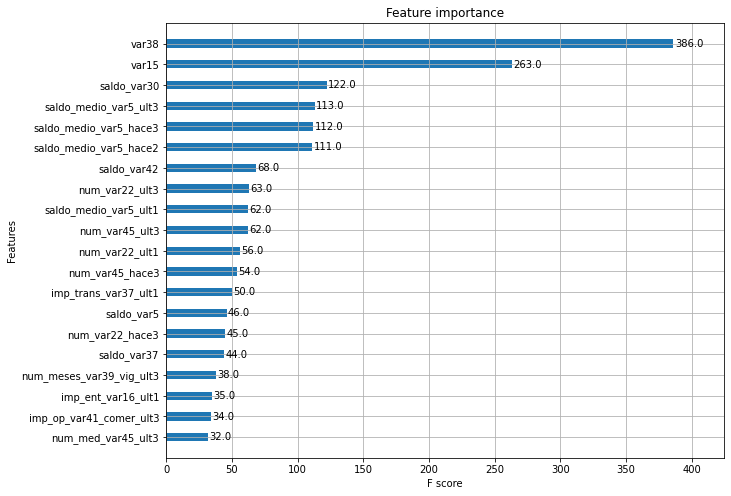

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)
plt.savefig('santander_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.146417
[9]	valid_0's auc: 0.851646

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	valid_1's binary_logloss: 0.146491
[9]	valid_0's auc: 0.849282	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.145923
[9]	valid_0's auc: 0.86570

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	valid_1's binary_logloss: 0.146384
[9]	valid_0's auc: 0.86262	

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.853067	va

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
[2]	valid_0's auc: 0.842931	valid_0's binary_logloss: 0.1503	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.15948
[3]	valid_0's auc: 0.850877	valid_0's binary_logloss: 0.14631	valid_1's auc: 0.832212	valid_1's binary_logloss: 0.155775
[4]	valid_0's auc: 0.854431	valid_0's binary_logloss: 0.143104	valid_1's auc: 0.83392	valid_1's binary_logloss: 0.152698
[5]	valid_0's auc: 0.85663	valid_0's binary_logloss: 0.140582	valid_1's auc: 0.835094	valid_1's binary_logloss: 0.150349
[6]	valid_0's auc: 0.859142	valid_0's binary_logloss: 0.138289	valid_1's auc: 0.836166	valid_1's binary_logloss: 0.148424
[7]	valid_0's auc: 0.861364	valid_0's binary_logloss: 0.136413	valid_1's auc: 0.837184	valid_1's binary_logloss: 0.146912
[8]	valid_0's auc: 0.862199	valid_0's binary_logloss: 0.134841	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.145726
[9]	valid_0's auc: 0.864095	val

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.15321
[5]	valid_0's auc: 0.853379	valid_0's binary_logloss: 0.140508	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.150854
[6]	valid_0's auc: 0.855463	valid_0's binary_logloss: 0.138297	valid_1's auc: 0.833116	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.856723	valid_0's binary_logloss: 0.136504	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.147577
[8]	valid_0's auc: 0.858076	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.835315	valid_1's binary_logloss: 0.146273
[9]	valid_0's auc: 0.861024

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
[2]	training's auc: 0.828798	training's binary_logloss: 0.150959	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.159734
[3]	training's auc: 0.839609	training's binary_logloss: 0.147147	valid_1's auc: 0.829436	valid_1's binary_logloss: 0.156119
[4]	training's auc: 0.845158	training's binary_logloss: 0.144107	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.153073
[5]	training's auc: 0.847711	training's binary_logloss: 0.14162	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.150773
[6]	training's auc: 0.849184	training's binary_logloss: 0.139622	valid_1's auc: 0.839076	valid_1's binary_logloss: 0.148948
[7]	training's auc: 0.85094	training's binary_logloss: 0.13786	valid_1's auc: 0.839943	valid_1's binary_logloss: 0.147346
[8]	training's auc: 0.853386	training's binary_logloss: 0.136418	valid_1's auc: 0.84098	valid_1's binary_logloss: 0.146068
[9]	training

In [17]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yong\anaconda3\envs\pymldgrev2\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	